********
## Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected:Uninfected Users</a></h2>
        <ol>
            <ul> <h3> 1.1 <a href='#1.1' style="text-decoration : none; color : #000000;"> Random State 0</a></h3></ul>
            <ul> <h3> 1.2 <a href='#1.2' style="text-decoration : none; color : #000000;"> Random State 10</a></h3></ul>
            <ul> <h3> 1.3 <a href='#1.3' style="text-decoration : none; color : #000000;"> Random State 20</a></h3></ul>
        </ol>  
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 30:70 Infected:Uninfected Users</a></h2>
        <ol>
            <ul> <h3> 2.1 <a href='#2.1' style="text-decoration : none; color : #000000;"> Random State 0</a></h3></ul>
            <ul> <h3> 2.2 <a href='#2.2' style="text-decoration : none; color : #000000;"> Random State 10</a></h3></ul>
            <ul> <h3> 2.3 <a href='#2.3' style="text-decoration : none; color : #000000;"> Random State 20</a></h3></ul>
        </ol>  
     </ol>
</ol>

In [1]:
### Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns",80)

from IPython.display import HTML


from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Infected:Uninfected Users</a>

### 1.1  <a id='1.1' style="text-decoration : none; color : #000000;"> </a>Random State 0

In [2]:
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_0.csv',index_col='Source_User')

print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      1923
uninfected    1923
Name: Target, dtype: int64

### Feature Set

In [3]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']

### Feature Code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC        PAR       PAS  \
Source_User                                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   342  10.783626  9.897661   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...    42   9.476190  9.595238   

                                                           LEN          BYS  \
Source_User                                                                   
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   83.982456  2232.368421   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  119.285714  1357.809524   

                                                            BYR     SP    DP  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  7639.970760  337.0  14.0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  5211.809524   42.0   3.0   

                                                    NAPP  SIP  DIP  \
Source_User                                                          
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    22   30  123   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     7    3   20   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  13642.195906    12     5   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...   2319.000000     0     0   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     0     0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     3     6   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    16     5     4    14   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     8     1   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     9    25    46    27   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     9    24     0     0   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    98    16    38    12   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    2200  2300  
Source_User                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     6     0  
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0

In [4]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [5]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[-0.73671724, -0.46059155, -0.39092739, -0.20253521, -0.2412572 ,
        -0.42607732, -0.84300382, -0.105222  , -0.62255672, -0.41030656,
        -0.73056927,  0.00193202, -0.60792318, -0.59486484, -0.54607492,
        -0.50901258, -0.48955369, -0.47010601, -0.45323851, -0.56746305,
        -0.6514675 , -0.7369301 , -0.70116013, -0.83332565, -0.89097819,
        -0.73437188, -0.74078555, -0.58592764, -0.41334347, -0.51756222,
        -0.05254116, -0.5957998 , -0.48354239, -0.6348013 , -0.64642222,
        -0.69236359],
       [-0.84105078, -0.46488731, -0.39270498,  0.19748905, -0.25644147,
        -0.43197345, -0.98377844, -0.14989671, -1.58726964, -1.43926362,
        -0.89480084, -0.21660547, -0.67716282, -0.6199032 , -0.54607492,
        -0.50901258, -0.48955369, -0.47010601, -0.45323851, -0.56746305,
        -0.67428791, -0.79080535, -0.87194032, -0.88402101, -0.8472073 ,
        -0.86658055, -0.74078555, -0.5953952 , -0.80306768, -0.70838918,
        -0.74527506, -0.70147

In [6]:
### Function get_purity will take as input the labels predicted by the algorithm and use them to analyze the purity of clusters
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt=mt.xs('Target')
    a=[]
    for i in range(0,len(mt.index)):
        if i==0:
            a.append(mt.index[i]+"#")
        if i==1:
            a.append(mt.index[i]+"#")
        if i==2:
            a.append(mt.index[i]+"%")
        if i==3:
            a.append(mt.index[i]+"%")
    mt.index=a
    display(mt.round(2))
   
  
### Function get_kmeans will take as input, data and apply kmeans on it for k=1 to 5
### The function will then store the sum of sqaure of distances for each value of k and plot an elbow plot
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

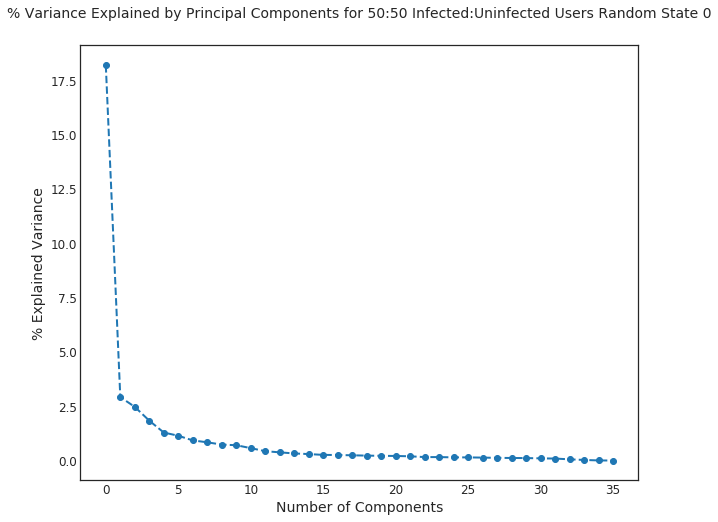

In [7]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Infected:Uninfected Users Random State 0',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [8]:
pca_explained_variance_50_0=pca.explained_variance_

In [9]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.900113362114


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.232138  0.020851  0.011724 -0.001776  0.006692  0.020511  0.223342   
PC-2  -0.002207  0.557099  0.542043  0.073533  0.283040  0.540751  0.009933   
PC-3   0.071578 -0.057040 -0.061904  0.128675 -0.034633 -0.055156  0.063525   
PC-4   0.033279 -0.009876 -0.033806 -0.033777 -0.053696 -0.005782 -0.023616   
PC-5  -0.002292  0.011981  0.014902  0.534677 -0.020764  0.011923 -0.132523   
PC-6   0.056742  0.020247  0.040357 -0.439560  0.076123  0.020187  0.012920   
PC-7  -0.000408 -0.242174  0.129286 -0.017878  0.885158 -0.344631 -0.022365   
PC-8   0.024732  0.013565  0.012229  0.064647 -0.057565  0.020139 -0.067923   
PC-9  -0.015868  0.020857  0.019469 -0.482698 -0.002668  0.029726 -0.056194   
PC-10 -0.023137  0.046635  0.004553 -0.487183 -0.073164  0.061937 -0.085226   
PC-11 -0.000612  0.009405 -0.019727 -0.131768 -0.021761  0.015591 -0.029405   
PC-12 -0.004915  0.006635 -0.020123 -0.010808 -0.001174  0.005272  0.036415   
PC-13  0.017859  0.000264  0.021079 -0.027342 -0.011708  0.001305 -0.112924   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.076853  0.185103  0.098337  0.210550 -0.053323  0.193687  0.179869   
PC-2  -0.002267  0.033627  0.000631  0.007976 -0.012800  0.013403  0.030410   
PC-3   0.228325 -0.074347 -0.125661  0.110358  0.055706  0.017253  0.146239   
PC-4  -0.144054 -0.072907 -0.176571 -0.067221  0.101160  0.244537  0.276832   
PC-5   0.484928 -0.271758 -0.328099  0.127093  0.361479 -0.061543 -0.108579   
PC-6  -0.332245 -0.221962 -0.400535 -0.189732  0.469732 -0.074433 -0.108330   
PC-7   0.083961 -0.008461  0.042460  0.021592 -0.037367 -0.003428  0.010469   
PC-8  -0.024501 -0.119087 -0.135984 -0.102777 -0.655067 -0.172949 -0.171656   
PC-9   0.392731 -0.109828 -0.537136  0.169128 -0.355042  0.067876  0.060455   
PC-10  0.435548  0.068602  0.386219  0.134645  0.253695 -0.149347 -0.068676   
PC-11  0.254504  0.060916  0.228052  0.118149  0.010097  0.136280 -0.025772   
PC-12  0.019619  0.066161 -0.068820  0.034332  0.013853 -0.031440  0.110734   
PC-13 -0.009597 -0.190928  0.170467 -0.107614 -0.037877 -0.142527 -0.300400   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.164304  0.162214  0.167214  0.161313  0.141738  0.147994  0.152104   
PC-2   0.037851  0.042564  0.031083  0.025481  0.008198 -0.012667 -0.019629   
PC-3   0.257077  0.338547  0.366032  0.372819  0.328747  0.160604  0.047564   
PC-4   0.266996  0.195094  0.079789 -0.043662 -0.192992 -0.358891 -0.406365   
PC-5  -0.122177 -0.114362 -0.047028 -0.037019 -0.038769 -0.009366 -0.019609   
PC-6  -0.078232 -0.002434  0.045486  0.120691  0.203543  0.221339  0.168583   
PC-7   0.006622  0.004478  0.011092  0.012852 -0.006537 -0.035229 -0.036556   
PC-8  -0.087770  0.011713  0.073249  0.137941  0.209391  0.128516 -0.020402   
PC-9  -0.007993 -0.025172 -0.037168 -0.086992 -0.145688 -0.084709 -0.006636   
PC-10 -0.034395  0.049170  0.077490  0.072634  0.042280 -0.072773 -0.182951   
PC-11 -0.096558 -0.137119 -0.123012 -0.081388 -0.007062  0.223167  0.207895   
PC-12  0.287933  0.200138  0.026647 -0.187729 -0.381849 -0.101613  0.346600   
PC-13 -0.094996  0.107188  0.306963  0.287170 -0.067527 -0.447850 -0.148244   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.167150  0.175662  0.182794  0.185096  0.195219  0.190556  0.193360   
PC-2  -0.030545 -0.026527 -0.018293 -0.020299 -0.029855 -0.039150 -0.033176   
PC-3  -0.066569 -0.087000 -0.071213 -0.108069 -0.126472 -0.192399 -0.149404   
PC-4  -0.337549 -0.267138 -0.183216 -0.106604 -0.032656  0.039690  0.022126   
PC-5   0.009933  0.010654 -0.023215 -0.021660  0.058160  0.095651  0.084362   
PC-6   0.067806 -0.024188 -0.045652 -0.081612 -0.024038  0.021476  0.001027   
PC-7  -0.026793 -0.046451 -0.032337 -0.012940 -0.008323  0.017271  0.003446   
PC-8  -0.125022 -0.199518 -0.210410 -0.176229 -0.057755  0

In [10]:
pca_inv_data_50_0=pca.components_
pca_data_50_0=m

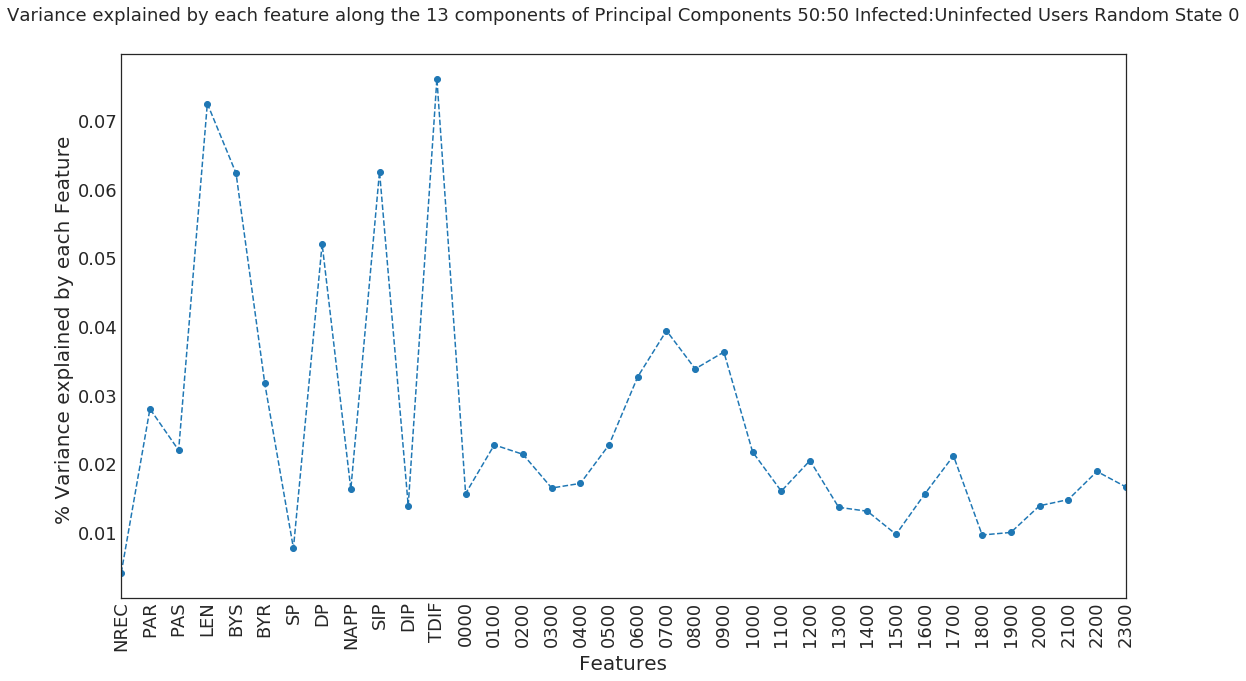

In [11]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 50:50 Infected:Uninfected Users Random State 0',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 6.75409818239e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1921.00    2.0
infected%         50.03    0.0
uninfected%       49.97  100.0

Sum of square of distances is: 3.43657248351e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1     2
infected#       1839.00    0.0  84.0
uninfected#     1855.00    2.0  66.0
infected%         49.78    0.0  56.0
uninfected%       50.22  100.0  44.0

Sum of square of distances is: 1.74058695641e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2      3
infected#       1766.00    0.0  153.00   4.00
uninfected#     1814.00    2.0  104.00   3.00
infected%         49.33    0.0   59.53  57.14
uninfected%       50.67  100.0   40.47  42.86

Sum of square of distances is: 1.07081004244e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



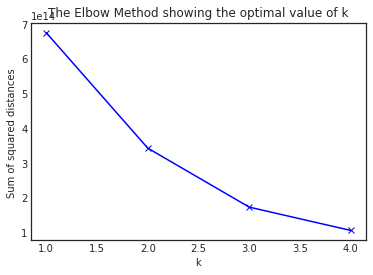

The minimum sum of sqaures of distances is : 1.07081004244e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [12]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 138456.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        813.00  1110.00
uninfected#     1679.00   244.00
infected%         32.62    81.98
uninfected%       67.38    18.02

Sum of square of distances is: 97466.5817854

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2
infected#        543.00  263.00  1117.00
uninfected#     1537.00   34.00   352.00
infected%         26.11   88.55    76.04
uninfected%       73.89   11.45    23.96

Sum of square of distances is: 84967.5199448

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1        2      3
infected#       340.00   514.00  1068.00    1.0
uninfected#      44.00  1520.00   359.00    0.0
infected%        88.54    25.27    74.84  100.0
uninfected%      11.46    74.73    25.16    0.0

Sum of square of distances is: 76442.2059367

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



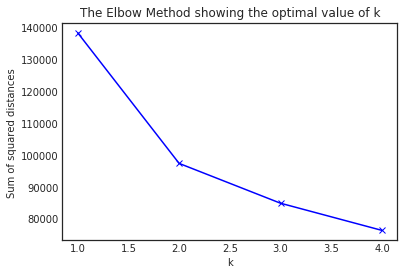

The minimum sum of sqaures of distances is : 76442.2059367  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.654634915721 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 11535.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1138.00   785.00
uninfected#      276.00  1647.00
infected%         80.48    32.28
uninfected%       19.52    67.72

Sum of square of distances is: 9258.00940086

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2
infected#       1005.00   793.00  125.00
uninfected#      262.00  1639.00   22.00
infected%         79.32    32.61   85.03
uninfected%       20.68    67.39   14.97

Sum of square of distances is: 7314.04209604

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2       3
infected#        851.00   4.00  935.00  133.00
uninfected#     1664.00   5.00  232.00   22.00
infected%         33.84  44.44   80.12   85.81
uninfected%       66.16  55.56   19.88   14.19

Sum of square of distances is: 5462.43143659

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



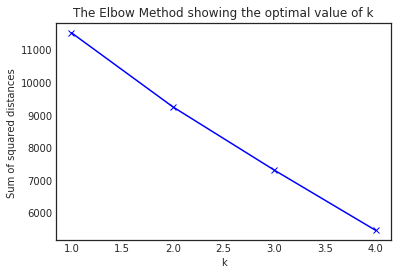

The minimum sum of sqaures of distances is : 5462.43143659  for k 4


In [14]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.705535110009 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 15380.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1133.00   790.00
uninfected#      287.00  1636.00
infected%         79.79    32.56
uninfected%       20.21    67.44

Sum of square of distances is: 13088.1108202

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1       2
infected#       988.0   795.00  140.00
uninfected#     269.0  1628.00   26.00
infected%        78.6    32.81   84.34
uninfected%      21.4    67.19   15.66

Sum of square of distances is: 11088.7060599

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2      3
infected#        831.00  151.00  937.00   4.00
uninfected#     1649.00   28.00  241.00   5.00
infected%         33.51   84.36   79.54  44.44
uninfected%       66.49   15.64   20.46  55.56

Sum of square of distances is: 9234.35084869

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



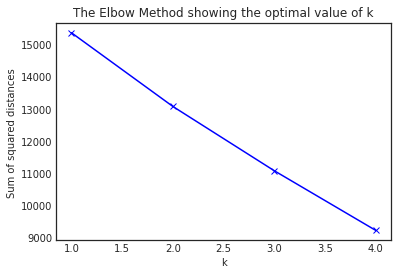

The minimum sum of sqaures of distances is : 9234.35084869  for k 4


In [15]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.741304692744 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 19225.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1303.00   620.00
uninfected#      380.00  1543.00
infected%         77.42    28.66
uninfected%       22.58    71.34

Sum of square of distances is: 16817.0376473

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1289.00   613.00  21.00
uninfected#      373.00  1534.00  16.00
infected%         77.56    28.55  56.76
uninfected%       22.44    71.45  43.24

Sum of square of distances is: 14558.7938024

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1       2        3
infected#       928.0  19.00  324.00   652.00
uninfected#     311.0  11.00   64.00  1537.00
infected%        74.9  63.33   83.51    29.79
uninfected%      25.1  36.67   16.49    70.21

Sum of square of distances is: 12767.9912104

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



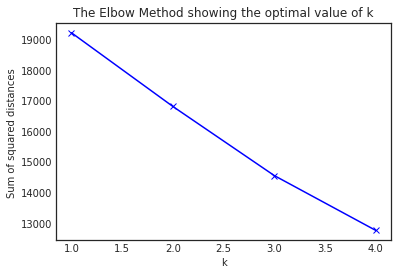

The minimum sum of sqaures of distances is : 12767.9912104  for k 4


In [16]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.772967001788 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 23070.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1901.00  22.00
uninfected#     1910.00  13.00
infected%         49.88  62.86
uninfected%       50.12  37.14

Sum of square of distances is: 20433.9006896

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1        2
infected#        431.0  145.00  1347.00
uninfected#     1372.0   28.00   523.00
infected%         23.9   83.82    72.03
uninfected%       76.1   16.18    27.97

Sum of square of distances is: 18616.9535694

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0     1       2        3
infected#       423.00  17.0  848.00   635.00
uninfected#     104.00   8.0  282.00  1529.00
infected%        80.27  68.0   75.04    29.34
uninfected%      19.73  32.0   24.96    70.66

Sum of square of distances is: 16165.1544946

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



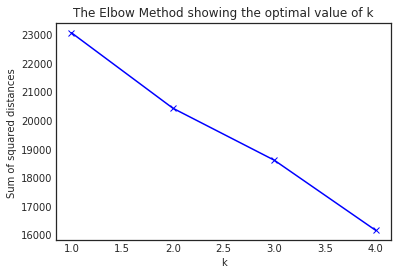

The minimum sum of sqaures of distances is : 16165.1544946  for k 4


In [17]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.842318423809 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 34605.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
infected#       1905.00  18.0
uninfected#     1916.00   7.0
infected%         49.86  72.0
uninfected%       50.14  28.0

Sum of square of distances is: 31909.2809271

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1        2
infected#        5.00   575.00  1343.00
uninfected#      4.00  1482.00   437.00
infected%       55.56    27.95    75.45
uninfected%     44.44    72.05    24.55

Sum of square of distances is: 29796.2507008

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2     3
infected#        581.00  1323.00   1.0  18.0
uninfected#     1486.00   429.00   1.0   7.0
infected%         28.11    75.51  50.0  72.0
uninfected%       71.89    24.49  50.0  28.0

Sum of square of distances is: 27217.0472513

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



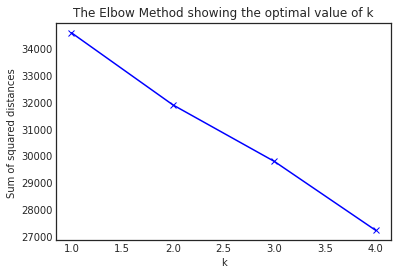

The minimum sum of sqaures of distances is : 27217.0472513  for k 4


In [18]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.877720642615 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 42295.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1907.0  16.00
uninfected#     1922.0   1.00
infected%         49.8  94.12
uninfected%       50.2   5.88

Sum of square of distances is: 39254.0868458

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2
infected#       1016.00  891.00  16.00
uninfected#     1712.00  210.00   1.00
infected%         37.24   80.93  94.12
uninfected%       62.76   19.07   5.88

Sum of square of distances is: 36744.9579613

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#        997.00  908.0  16.00    2.0
uninfected#     1695.00  227.0   1.00    0.0
infected%         37.04   80.0  94.12  100.0
uninfected%       62.96   20.0   5.88    0.0

Sum of square of distances is: 34492.150271

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



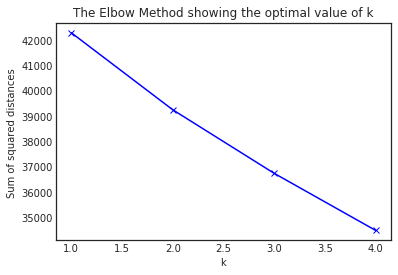

The minimum sum of sqaures of distances is : 34492.150271  for k 4


In [19]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.88965170397 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 46140.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1907.0  16.00
uninfected#     1922.0   1.00
infected%         49.8  94.12
uninfected%       50.2   5.88

Sum of square of distances is: 43088.4929477

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1        2
infected#        5.00  1297.00   621.00
uninfected#      4.00   393.00  1526.00
infected%       55.56    76.75    28.92
uninfected%     44.44    23.25    71.08

Sum of square of distances is: 41309.5405973

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
infected#       1150.0   471.00  287.0  15.00
uninfected#      524.0  1335.00   63.0   1.00
infected%         68.7    26.08   82.0  93.75
uninfected%       31.3    73.92   18.0   6.25

Sum of square of distances is: 38392.7827238

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



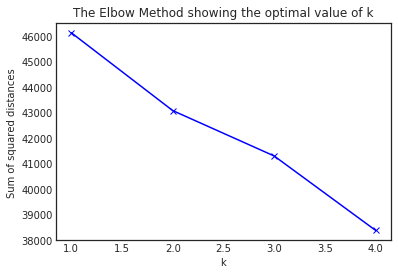

The minimum sum of sqaures of distances is : 38392.7827238  for k 4


In [20]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.900113362114 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 49985.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1262.00   661.00
uninfected#      363.00  1560.00
infected%         77.66    29.76
uninfected%       22.34    70.24

Sum of square of distances is: 47309.3033593

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2
infected#       914.00   457.0  552.00
uninfected#     516.00  1287.0  120.00
infected%        63.92    26.2   82.14
uninfected%      36.08    73.8   17.86

Sum of square of distances is: 45132.4088644

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2       3
infected#       496.00   465.00  16.00  946.00
uninfected#     110.00  1301.00   1.00  511.00
infected%        81.85    26.33  94.12   64.93
uninfected%      18.15    73.67   5.88   35.07

Sum of square of distances is: 42133.9724093

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



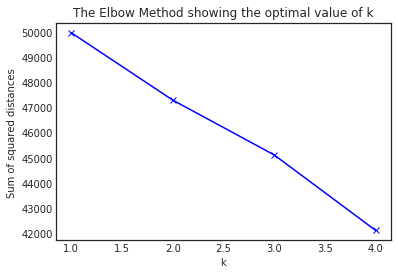

The minimum sum of sqaures of distances is : 42133.9724093  for k 4


In [21]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 1.2  <a id='1.2' style="text-decoration : none; color : #000000;"> Random State 10</a>

In [22]:
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_10.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      1923
uninfected    1923
Name: Target, dtype: int64

### Feature Set

In [23]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC         PAR  \
Source_User                                                            
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  2984  216.771448   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   264   25.242424   

                                                          PAS        LEN  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  74.177949  82.084115   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  35.803030  69.193182   

                                                             BYS  \
Source_User                                                        
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   9038.178284   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  30610.265152   

                                                              BYR      SP  \
Source_User                                                                 
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  286763.437332  2689.0   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   11302.988636   263.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  13.0    45   19  784   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   7.0    19   36   97   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   1642.074397   265   188   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  17986.772727     0     5   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   248    39    82    43   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0    16     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   112    20    50    46   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0     6    51   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    89    81    80   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    45    11     8     9   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    70   200   116   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    20     2     6    13   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   195   158   176   167   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     4    42    18     8   

                                                    2200  2300  
Source_User                                                     
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   116   233  
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0

In [24]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [25]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 0.18997042,  0.24347962, -0.01672604, -0.19889619, -0.06069228,
         0.2893465 ,  0.28688263, -0.10502685,  0.86062073, -0.82086548,
         0.33445597, -0.24220196,  0.85406833,  0.33513966,  0.61069163,
        -0.32693774, -0.13329668, -0.27833984,  0.04388404, -0.44960236,
        -0.29048346, -0.3746726 ,  0.23942222,  0.01882053, -0.05206728,
        -0.06486069,  0.17901198, -0.15037235,  0.88795427,  0.11360726,
         0.63385746,  0.34968209,  0.42719666,  0.32706778,  0.02025753,
         0.65113305],
       [-0.75656466, -0.42845677, -0.20685584, -0.32798586,  0.06759316,
        -0.43924677, -0.8685032 , -0.13002014, -0.80782887, -0.17782812,
        -0.76607122,  0.08918306, -0.67391129, -0.5844027 , -0.53835687,
        -0.42997378, -0.47411341, -0.46611916, -0.45548557, -0.56655358,
        -0.62640061, -0.32974413, -0.39686057, -0.76642729, -0.83736443,
        -0.78439145, -0.63633627, -0.78792149, -0.74507283, -0.61293413,
        -0.70995073, -0.41900

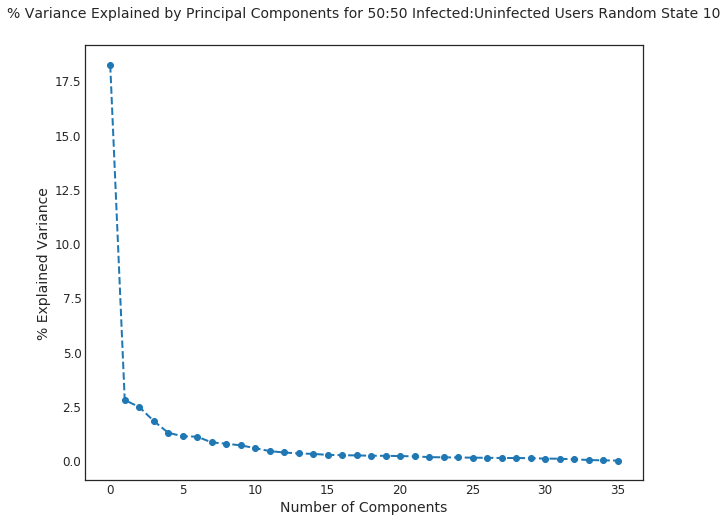

In [26]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Infected:Uninfected Users Random State 10',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [27]:
pca_explained_variance_50_10=pca.explained_variance_

In [28]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.902209458443


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.231903  0.023023  0.008678 -0.002483  0.001105  0.022853  0.223284   
PC-2  -0.007480  0.559787  0.550600  0.002536  0.332576  0.511792  0.006579   
PC-3   0.072271 -0.007467 -0.023504  0.125450 -0.026116 -0.002592  0.061051   
PC-4   0.030335 -0.000312 -0.045858 -0.025385 -0.065541  0.013480 -0.029250   
PC-5   0.005503 -0.021526  0.091918  0.490556  0.156412 -0.052410 -0.120404   
PC-6   0.003600 -0.309809  0.273901 -0.042371  0.742528 -0.470610  0.006910   
PC-7  -0.057940  0.007871 -0.052887  0.515279 -0.081962  0.020101 -0.022525   
PC-8   0.012791  0.020728 -0.001257 -0.018650 -0.038685  0.030572 -0.098657   
PC-9   0.023725  0.003668 -0.020213  0.605290 -0.026271  0.004769  0.074752   
PC-10 -0.019108  0.022522 -0.015176 -0.307461 -0.047517  0.033802 -0.058187   
PC-11 -0.002240 -0.013381 -0.005153 -0.109235  0.021290 -0.017553 -0.020064   
PC-12 -0.004859 -0.001139 -0.008538 -0.005800  0.003529 -0.004323  0.036184   
PC-13  0.015636  0.005254  0.003512 -0.018206 -0.018939  0.008162 -0.104223   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.075582  0.185553  0.099239  0.210483 -0.055599  0.194969  0.180365   
PC-2  -0.022764  0.041643  0.022483  0.000013 -0.026027  0.014581  0.020463   
PC-3   0.232583 -0.075891 -0.133941  0.109007  0.064047  0.033490  0.157326   
PC-4  -0.155790 -0.073906 -0.174722 -0.072636  0.105674  0.235362  0.260582   
PC-5   0.408717 -0.276980 -0.352811  0.094335  0.443863 -0.061600 -0.110909   
PC-6  -0.036384  0.030102  0.136483 -0.011993 -0.114863  0.020020  0.045245   
PC-7   0.393310  0.199323  0.351212  0.212669 -0.361438  0.080574  0.102664   
PC-8   0.159425 -0.111261 -0.118509 -0.032728 -0.650118 -0.178032 -0.176962   
PC-9  -0.528550  0.091354  0.357171 -0.219716  0.133558 -0.063015 -0.065862   
PC-10  0.293052  0.099426  0.556501  0.081166  0.431056 -0.137710 -0.070963   
PC-11  0.216114  0.077953  0.240998  0.105953  0.044131  0.132686 -0.017361   
PC-12  0.010023  0.057751 -0.067338  0.028095  0.014574 -0.017753  0.131820   
PC-13  0.021084 -0.144155  0.151851 -0.086483 -0.030278 -0.175289 -0.312232   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.165778  0.162398  0.164192  0.160458  0.142992  0.147518  0.151340   
PC-2   0.020472  0.021538  0.005760 -0.002364 -0.016406 -0.025966 -0.023603   
PC-3   0.267689  0.349429  0.368786  0.372873  0.317972  0.143092  0.028132   
PC-4   0.243971  0.172454  0.061371 -0.056904 -0.201365 -0.369924 -0.407794   
PC-5  -0.126662 -0.110063 -0.050045 -0.025711 -0.014273  0.025853  0.015337   
PC-6   0.053593  0.044510  0.036315  0.022668 -0.000409 -0.055515 -0.061894   
PC-7   0.059047 -0.010363 -0.062697 -0.137331 -0.219814 -0.223175 -0.159574   
PC-8  -0.106430 -0.003885  0.066848  0.122307  0.175719  0.102953 -0.051851   
PC-9   0.003607  0.018020  0.038810  0.090023  0.163459  0.121299  0.045997   
PC-10 -0.033357  0.043467  0.078599  0.076374  0.066902 -0.050001 -0.171463   
PC-11 -0.070505 -0.122538 -0.137641 -0.103961 -0.044978  0.230339  0.257268   
PC-12  0.282649  0.208951  0.045127 -0.197132 -0.408617 -0.067638  0.345666   
PC-13 -0.068679  0.104011  0.287361  0.265325 -0.067890 -0.478525 -0.122108   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.168392  0.175554  0.180944  0.183910  0.194095  0.191988  0.194070   
PC-2  -0.025194 -0.020013 -0.012487 -0.014073 -0.020792 -0.024616 -0.021818   
PC-3  -0.085498 -0.107557 -0.091299 -0.119225 -0.134057 -0.192510 -0.149096   
PC-4  -0.329637 -0.264368 -0.193664 -0.103671 -0.023649  0.056104  0.031251   
PC-5   0.024138  0.000086 -0.016946 -0.021096  0.049012  0.089691  0.075326   
PC-6  -0.041687 -0.025603 -0.014948  0.000699  0.000898  0.007054 -0.003925   
PC-7  -0.065675  0.026457  0.059273  0.089003  0.031319 -0.021810  0.003010   
PC-8  -0.141562 -0.206308 -0.205886 -0.165958 -0.044433  0

In [29]:
pca_inv_data_50_10=pca.components_
pca_data_50_10=m

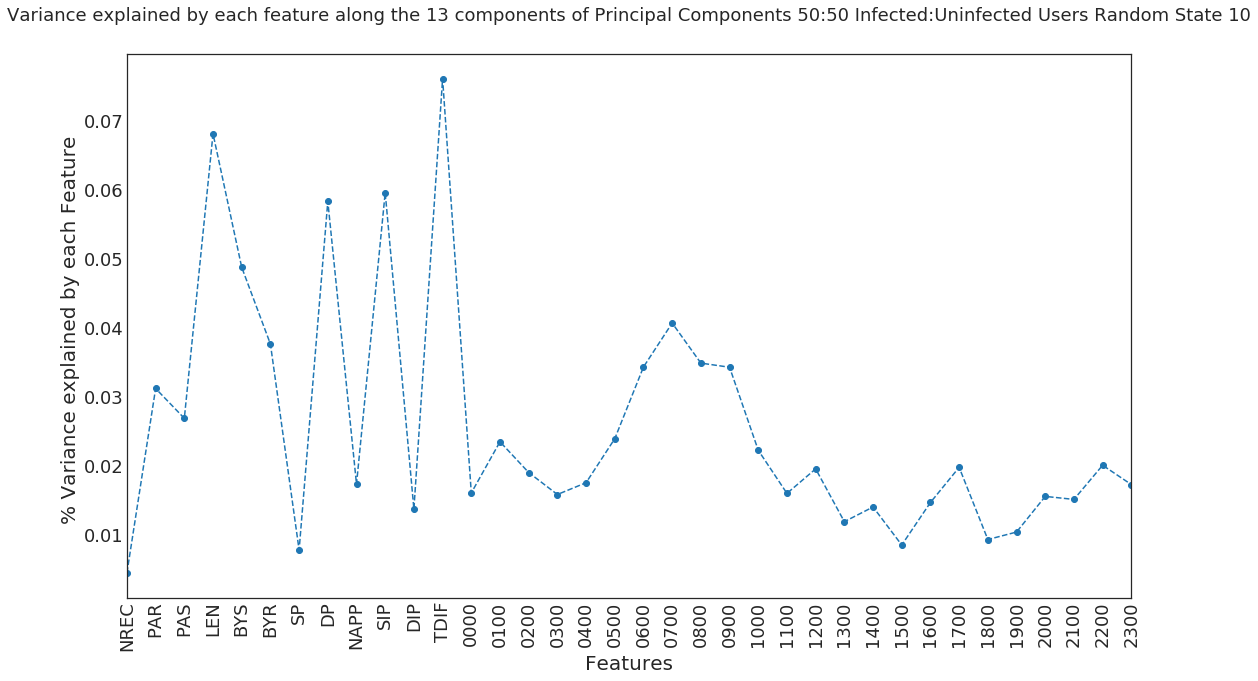

In [30]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 50:50 Infected:Uninfected Users Random State 10',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 6.67902092233e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
infected#       1921.00   2.0
uninfected#     1920.00   3.0
infected%         50.01  40.0
uninfected%       49.99  60.0

Sum of square of distances is: 3.9649978279e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1829.00    0.0  94.00
uninfected#     1863.00    3.0  57.00
infected%         49.54    0.0  62.25
uninfected%       50.46  100.0  37.75

Sum of square of distances is: 2.58073212853e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2      3
infected#       1813.00    0.0  110.00    0.0
uninfected#     1856.00    3.0   63.00    1.0
infected%         49.41    0.0   63.58    0.0
uninfected%       50.59  100.0   36.42  100.0

Sum of square of distances is: 1.77888246905e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



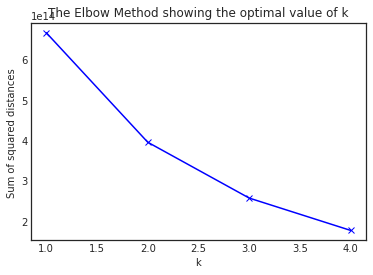

The minimum sum of sqaures of distances is : 1.77888246905e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [31]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 138456.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        810.00  1113.00
uninfected#     1681.00   242.00
infected%         32.52    82.14
uninfected%       67.48    17.86

Sum of square of distances is: 96919.1151038

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2
infected#       1090.00   526.00  307.00
uninfected#      335.00  1550.00   38.00
infected%         76.49    25.34   88.99
uninfected%       23.51    74.66   11.01

Sum of square of distances is: 84869.9481525

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2      3
infected#        513.00  343.00  1066.00    1.0
uninfected#     1538.00   42.00   343.00    0.0
infected%         25.01   89.09    75.66  100.0
uninfected%       74.99   10.91    24.34    0.0

Sum of square of distances is: 76331.4434687

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



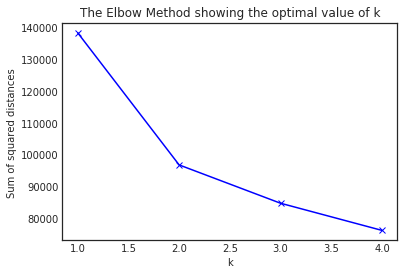

The minimum sum of sqaures of distances is : 76331.4434687  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [32]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.652079204487 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 11535.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        792.00  1131.00
uninfected#     1664.00   259.00
infected%         32.25    81.37
uninfected%       67.75    18.63

Sum of square of distances is: 9221.90542268

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2
infected#       1114.00   808.0   1.00
uninfected#      240.00  1678.0   5.00
infected%         82.27    32.5  16.67
uninfected%       17.73    67.5  83.33

Sum of square of distances is: 7183.90343879

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2      3
infected#        845.00  950.00  127.00   1.00
uninfected#     1666.00  234.00   18.00   5.00
infected%         33.65   80.24   87.59  16.67
uninfected%       66.35   19.76   12.41  83.33

Sum of square of distances is: 5224.30374857

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



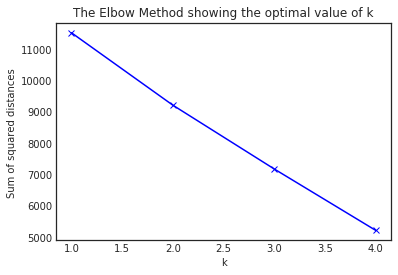

The minimum sum of sqaures of distances is : 5224.30374857  for k 4


In [33]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.702689403644 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 15380.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        780.00  1143.00
uninfected#     1648.00   275.00
infected%         32.13    80.61
uninfected%       67.87    19.39

Sum of square of distances is: 13054.538861

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1111.00   811.00   1.00
uninfected#      256.00  1662.00   5.00
infected%         81.27    32.79  16.67
uninfected%       18.73    67.21  83.33

Sum of square of distances is: 11009.1307362

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2      3
infected#        838.00  155.00  929.0   1.00
uninfected#     1637.00   22.00  259.0   5.00
infected%         33.86   87.57   78.2  16.67
uninfected%       66.14   12.43   21.8  83.33

Sum of square of distances is: 8994.12089658

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



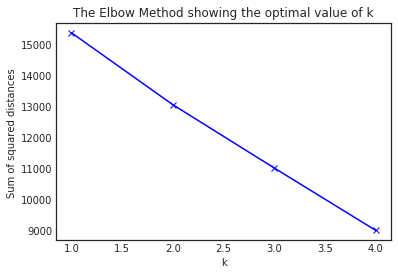

The minimum sum of sqaures of distances is : 8994.12089658  for k 4


In [34]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.738248158386 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 19225.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        623.00  1300.00
uninfected#     1574.00   349.00
infected%         28.36    78.84
uninfected%       71.64    21.16

Sum of square of distances is: 16799.5539205

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1262.00   657.00   4.00
uninfected#      324.00  1591.00   8.00
infected%         79.57    29.23  33.33
uninfected%       20.43    70.77  66.67

Sum of square of distances is: 14726.6481178

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1      2        3
infected#        4.00   596.00  25.00  1298.00
uninfected#      8.00  1563.00   5.00   347.00
infected%       33.33    27.61  83.33    78.91
uninfected%     66.67    72.39  16.67    21.09

Sum of square of distances is: 12708.4911406

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



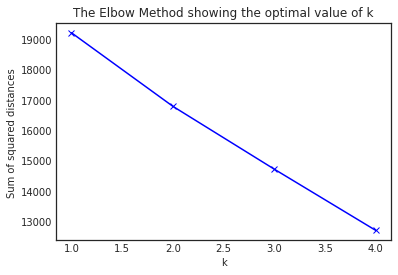

The minimum sum of sqaures of distances is : 12708.4911406  for k 4


In [35]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.769273159743 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 23070.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        628.00  1295.00
uninfected#     1575.00   348.00
infected%         28.51    78.82
uninfected%       71.49    21.18

Sum of square of distances is: 20640.9712842

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1275.00   648.00    0.0
uninfected#      332.00  1590.00    1.0
infected%         79.34    28.95    0.0
uninfected%       20.66    71.05  100.0

Sum of square of distances is: 17978.5137197

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2      3
infected#       1099.00   633.00  191.00    0.0
uninfected#      346.00  1541.00   35.00    1.0
infected%         76.06    29.12   84.51    0.0
uninfected%       23.94    70.88   15.49  100.0

Sum of square of distances is: 15975.9990437

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



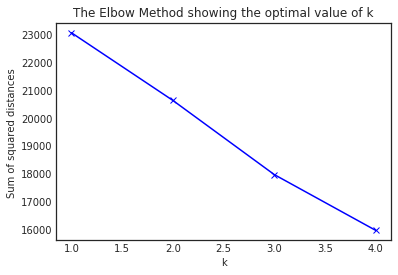

The minimum sum of sqaures of distances is : 15975.9990437  for k 4


In [36]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.844547376442 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 34605.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1272.00   651.00
uninfected#      355.00  1568.00
infected%         78.18    29.34
uninfected%       21.82    70.66

Sum of square of distances is: 31957.4925242

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1268.00   655.00    0.0
uninfected#      352.00  1570.00    1.0
infected%         78.27    29.44    0.0
uninfected%       21.73    70.56  100.0

Sum of square of distances is: 29268.2047536

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#        624.00  20.00  1279.00    0.0
uninfected#     1551.00   7.00   364.00    1.0
infected%         28.69  74.07    77.85    0.0
uninfected%       71.31  25.93    22.15  100.0

Sum of square of distances is: 26605.0759363

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



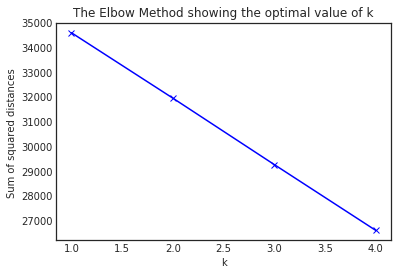

The minimum sum of sqaures of distances is : 26605.0759363  for k 4


In [37]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.879880191434 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 42295.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0        1
infected#       21.0  1902.00
uninfected#      4.0  1919.00
infected%       84.0    49.78
uninfected%     16.0    50.22

Sum of square of distances is: 39502.9089212

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
infected#        638.0    0.0  1285.00
uninfected#     1577.0    1.0   345.00
infected%         28.8    0.0    78.83
uninfected%       71.2  100.0    21.17

Sum of square of distances is: 36935.6708004

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       1267.00    0.0   641.00   15.0
uninfected#      339.00    4.0  1580.00    0.0
infected%         78.89    0.0    28.86  100.0
uninfected%       21.11  100.0    71.14    0.0

Sum of square of distances is: 34489.9642965

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



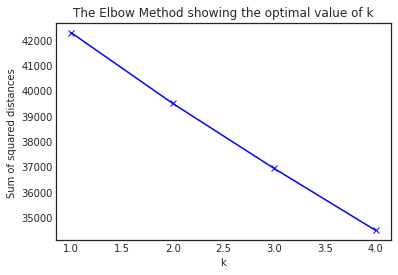

The minimum sum of sqaures of distances is : 34489.9642965  for k 4


In [38]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.891927828182 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 46140.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1
infected#       20.00  1903.00
uninfected#      4.00  1919.00
infected%       83.33    49.79
uninfected%     16.67    50.21

Sum of square of distances is: 43320.965636

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1250.00   658.00   15.0
uninfected#      336.00  1587.00    0.0
infected%         78.81    29.31  100.0
uninfected%       21.19    70.69    0.0

Sum of square of distances is: 40470.2362789

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       1228.00    0.0   680.00   15.0
uninfected#      324.00   19.0  1580.00    0.0
infected%         79.12    0.0    30.09  100.0
uninfected%       20.88  100.0    69.91    0.0

Sum of square of distances is: 37971.0192233

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



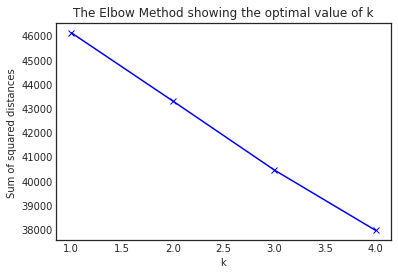

The minimum sum of sqaures of distances is : 37971.0192233  for k 4


In [39]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.902209458443 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 49985.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        688.00  1235.00
uninfected#     1601.00   322.00
infected%         30.06    79.32
uninfected%       69.94    20.68

Sum of square of distances is: 47282.9641208

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        673.00  1230.00  20.00
uninfected#     1587.00   332.00   4.00
infected%         29.78    78.75  83.33
uninfected%       70.22    21.25  16.67

Sum of square of distances is: 44495.3332217

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       1213.00  20.00   690.00    0.0
uninfected#      317.00  19.00  1586.00    1.0
infected%         79.28  51.28    30.32    0.0
uninfected%       20.72  48.72    69.68  100.0

Sum of square of distances is: 41885.2891073

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



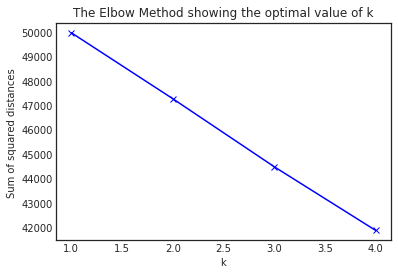

The minimum sum of sqaures of distances is : 41885.2891073  for k 4


In [40]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 1.3  <a id='1.3' style="text-decoration : none; color : #000000;"> Random State 20</a>

In [41]:
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_20.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      1923
uninfected    1923
Name: Target, dtype: int64

### Feature Set

In [42]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC         PAR  \
Source_User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  3475  119.307626   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   558   31.100358   

                                                          PAS         LEN  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  60.322302   94.924029   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  18.324373  120.193548   

                                                            BYS  \
Source_User                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  6983.720863   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  2986.801075   

                                                              BYR      SP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  151221.195108  3079.0   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   31418.557348   555.0   

                                                       DP  NAPP  SIP  DIP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  106.0    54   74  911   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    5.0    25   53  227   

                                                           TDIF  0000  0100  \
Source_User                                                                   
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1409.110216   419   383   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  8542.105735    13    44   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   267   141    95    48   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     2     6     5     3   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    31    11    30    33   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     4     1     0     8   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    39    68   187    89   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    25    35    44    67   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    79   110    56   187   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    94    27    18    19   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   161   174   303   126   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    30    32    40    32   

                                                    2200  2300  
Source_User                                                     
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   303   135  
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     6     3

In [43]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [44]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 0.07255051, -0.03163048, -0.01955619, -0.06459118, -0.01754391,
        -0.0487488 ,  0.45671977,  0.27303233,  1.44379058,  1.27231795,
         0.53131169, -0.23338903,  1.01445969,  0.68532811,  0.23399899,
         0.00958698, -0.03073631, -0.05232908, -0.08066193, -0.13504071,
        -0.1323841 , -0.17491694, -0.16805015, -0.06819198,  0.4514448 ,
         0.00170249, -0.04697928,  0.07994736, -0.173928  ,  0.34260363,
         0.20910591,  0.23756321,  0.59128462,  0.02636534,  0.89275594,
         0.04440836],
       [-0.18131934, -0.07100446, -0.02826955,  0.20690527, -0.01822382,
        -0.19039656, -0.72028584, -0.14193228, -0.41085824,  0.4793614 ,
        -0.56024091, -0.10342011, -0.36249524, -0.22182031, -0.20954962,
        -0.122576  , -0.09011605, -0.07812672, -0.10363034, -0.14871653,
        -0.19188756, -0.2467196 , -0.21756879, -0.15871946, -0.20641116,
        -0.11048681,  0.01799722, -0.24928746, -0.32945721, -0.3472652 ,
        -0.3145043 , -0.28526

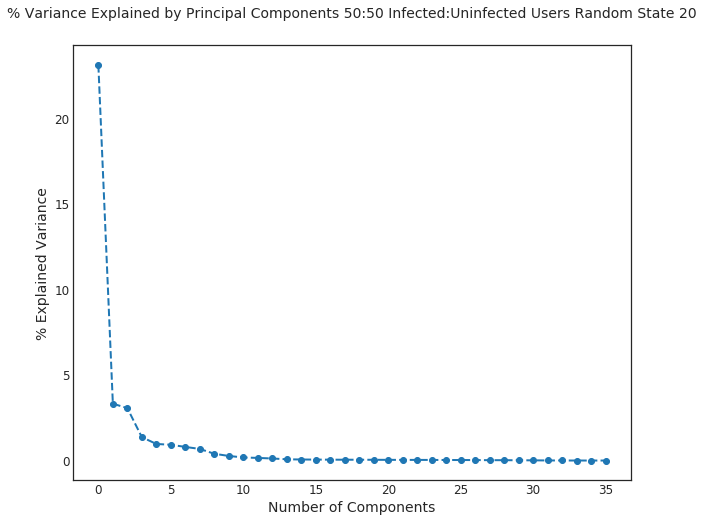

In [45]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components 50:50 Infected:Uninfected Users Random State 20',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [46]:
pca_explained_variance_50_20=pca.explained_variance_

In [47]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.980948185529


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.205443 -0.000947 -0.001414 -0.003881 -0.001457  0.001367  0.097931   
PC-2   0.078195  0.069612  0.075343 -0.020259  0.076049  0.000750 -0.427112   
PC-3  -0.009259  0.566008  0.555329  0.056198  0.552282  0.218008  0.054598   
PC-4   0.011440 -0.025674 -0.014514  0.586274 -0.013064 -0.051251 -0.051946   
PC-5  -0.021355  0.038445 -0.118619 -0.279430 -0.134255  0.612027  0.128869   
PC-6   0.024230  0.029450 -0.158283  0.282749 -0.178287  0.727834 -0.124905   
PC-7  -0.005415 -0.010024 -0.005148  0.556352 -0.005235 -0.022445  0.023727   
PC-8  -0.032316 -0.016366 -0.015557  0.427156 -0.015897 -0.008464  0.151456   
PC-9  -0.070503  0.002444 -0.005364 -0.019631 -0.005829  0.031568 -0.330413   
PC-10  0.013908 -0.000452 -0.002192 -0.044977 -0.001913  0.007796 -0.150792   
PC-11  0.012867  0.000560 -0.000145 -0.011341 -0.000194  0.001776  0.168865   
PC-12  0.011275 -0.001753 -0.004903 -0.000630 -0.003539  0.017317  0.568971   
PC-13  0.066218  0.000645  0.002754 -0.003837  0.001392 -0.011503 -0.053392   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.023282  0.063375  0.036047  0.070630 -0.018722  0.195466  0.194799   
PC-2  -0.201714 -0.459101 -0.311965 -0.464731  0.186313 -0.066879 -0.026791   
PC-3   0.034058  0.050801  0.026971  0.063085 -0.027684  0.010606  0.005707   
PC-4   0.648561 -0.180709 -0.249210  0.248873  0.253149 -0.002577  0.021704   
PC-5  -0.042006 -0.014721 -0.270174  0.089835  0.592374  0.061375  0.040627   
PC-6   0.049432  0.021443  0.196119 -0.080908 -0.456350 -0.047356 -0.023272   
PC-7  -0.402434  0.134375  0.486633 -0.161153  0.493093 -0.001776 -0.023060   
PC-8  -0.424800 -0.034207 -0.573431 -0.057866 -0.297031  0.103222  0.057404   
PC-9   0.153794 -0.219902  0.145126 -0.103135 -0.043929 -0.166137 -0.324512   
PC-10  0.097781 -0.424096  0.339131 -0.088717 -0.068975  0.335526  0.329449   
PC-11 -0.012754 -0.043893  0.013861  0.001753 -0.000462  0.028568  0.270257   
PC-12 -0.108639 -0.620470  0.151062  0.155697 -0.050715 -0.226851 -0.168185   
PC-13  0.106672  0.313441 -0.039537 -0.142460  0.015656 -0.209640 -0.167982   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.198593  0.198558  0.197653  0.196770  0.196611  0.197665  0.198168   
PC-2   0.065061  0.123883  0.145776  0.155865  0.140881  0.123679  0.112704   
PC-3  -0.006533 -0.014502 -0.017583 -0.019082 -0.017421 -0.015533 -0.014329   
PC-4   0.028375  0.025843  0.026755  0.022907  0.025239  0.018968  0.009492   
PC-5  -0.006667 -0.033775 -0.046948 -0.053453 -0.052941 -0.053920 -0.055780   
PC-6   0.019571  0.043826  0.053329  0.058183  0.055062  0.053475  0.054943   
PC-7  -0.016451 -0.017800 -0.013488 -0.009246 -0.012467 -0.008526 -0.001342   
PC-8  -0.003977 -0.051985 -0.071561 -0.080927 -0.087749 -0.098538 -0.101841   
PC-9  -0.279071 -0.197666 -0.145838 -0.125036 -0.148847 -0.105966 -0.075123   
PC-10  0.194740  0.085667  0.042481  0.012087 -0.035463 -0.115618 -0.160899   
PC-11  0.193925  0.106323  0.043528  0.010786  0.023752 -0.054820 -0.128513   
PC-12 -0.065327 -0.026019 -0.007431  0.007961  0.120858  0.169420  0.149185   
PC-13  0.088618  0.125475  0.121726  0.130847  0.181825  0.182035  0.151927   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.199278  0.200397  0.201074  0.200638  0.200045  0.201114  0.202249   
PC-2   0.078555  0.067430  0.090781  0.016744 -0.023507  0.007023  0.020522   
PC-3  -0.010620 -0.009006 -0.011748 -0.002954  0.002188 -0.001594 -0.002981   
PC-4  -0.000143 -0.001051  0.000639 -0.012206 -0.003845 -0.014797 -0.001691   
PC-5  -0.049264 -0.046098 -0.046833 -0.029974 -0.001177 -0.002820 -0.009351   
PC-6   0.042430  0.042253  0.045247  0.022512 -0.009936 -0.008314  0.001403   
PC-7   0.005825  0.007340  0.003241  0.015278 -0.000002  0.013452  0.003884   
PC-8  -0.092467 -0.080024 -0.079725 -0.054418 -0.007726  0

In [48]:
pca_inv_data_50_20=pca.components_
pca_data_50_20=m

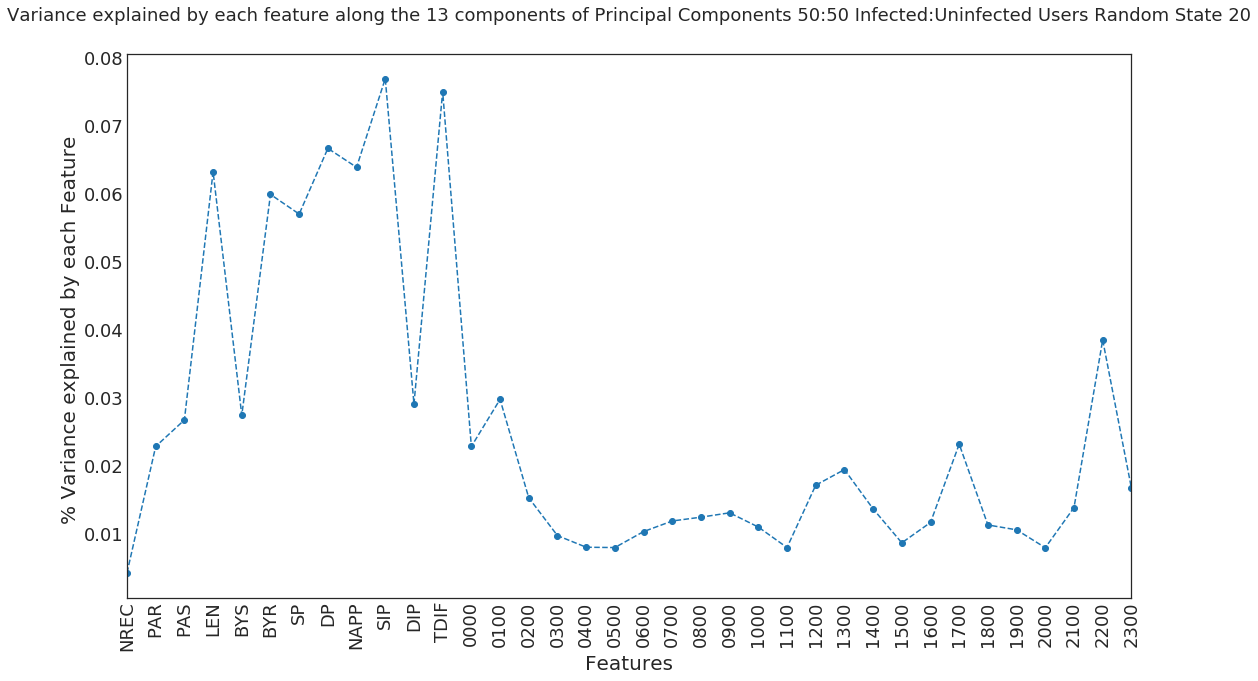

In [49]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 50:50 Infected:Uninfected Users Random State 20',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 1.35670463441e+17

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 2.69450424596e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 4.51086182857e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1913.00    0.0    0.0  10.00
uninfected#     1908.00    1.0    1.0  13.00
infected%         50.07    0.0    0.0  43.48
uninfected%       49.93  100.0  100.0  56.52

Sum of square of distances is: 2.33784078823e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



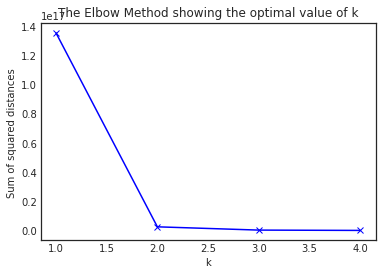

The minimum sum of sqaures of distances is : 2.33784078823e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [50]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 138456.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 61950.2726519

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#        681.00    0.0  1242.00
uninfected#     1629.00    1.0   293.00
infected%         29.48    0.0    80.91
uninfected%       70.52  100.0    19.09

Sum of square of distances is: 47084.3573305

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2        3
infected#        681.00    0.0    0.0  1242.00
uninfected#     1628.00    1.0    1.0   293.00
infected%         29.49    0.0    0.0    80.91
uninfected%       70.51  100.0  100.0    19.09

Sum of square of distances is: 35691.8333721

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



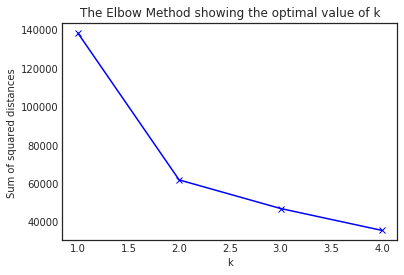

The minimum sum of sqaures of distances is : 35691.8333721  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [51]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.818746836558 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 11535.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 7790.71320552

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 4130.94224855

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
infected#        558.0  1365.00    0.0    0.0
uninfected#     1564.0   357.00    1.0    1.0
infected%         26.3    79.27    0.0    0.0
uninfected%       73.7    20.73  100.0  100.0

Sum of square of distances is: 1672.58976778

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



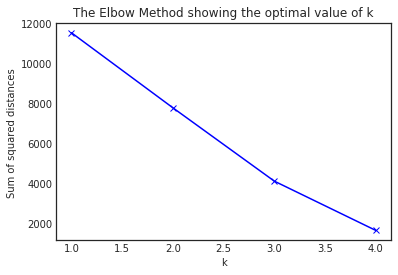

The minimum sum of sqaures of distances is : 1672.58976778  for k 4


In [52]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.856660025944 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 15380.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 11635.6551784

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 7975.01328332

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       1403.00    0.0   520.00    0.0
uninfected#      395.00    1.0  1526.00    1.0
infected%         78.03    0.0    25.42    0.0
uninfected%       21.97  100.0    74.58  100.0

Sum of square of distances is: 5433.1677548

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



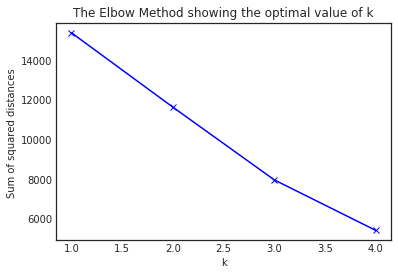

The minimum sum of sqaures of distances is : 5433.1677548  for k 4


In [53]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.883544819862 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 19225.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 15463.3281813

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 11734.6953871

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1373.00   550.00    0.0    0.0
uninfected#      369.00  1552.00    1.0    1.0
infected%         78.82    26.17    0.0    0.0
uninfected%       21.18    73.83  100.0  100.0

Sum of square of distances is: 9169.73407523

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



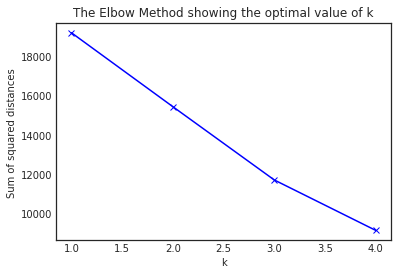

The minimum sum of sqaures of distances is : 9169.73407523  for k 4


In [54]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.909105347697 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 23070.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 19226.9891569

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 15447.4201905

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1923.00    0.0    0.0    0.0
uninfected#     1920.00    1.0    1.0    1.0
infected%         50.04    0.0    0.0    0.0
uninfected%       49.96  100.0  100.0  100.0

Sum of square of distances is: 12216.086687

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



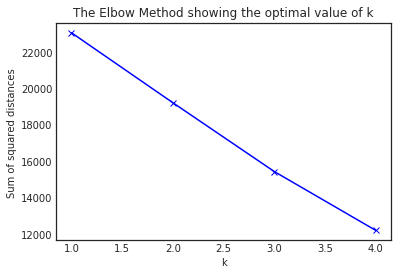

The minimum sum of sqaures of distances is : 12216.086687  for k 4


In [55]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.960970395667 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 34605.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 30804.5097559

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 26960.7099203

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       1351.00    0.0   572.00    0.0
uninfected#      349.00    1.0  1572.00    1.0
infected%         79.47    0.0    26.68    0.0
uninfected%       20.53  100.0    73.32  100.0

Sum of square of distances is: 24253.8883463

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



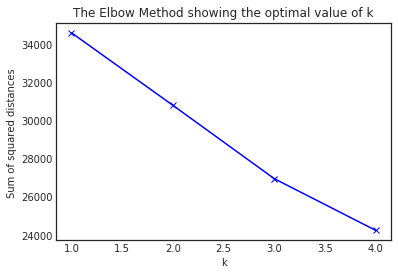

The minimum sum of sqaures of distances is : 24253.8883463  for k 4


In [56]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.973383843681 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 42295.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 38451.1981166

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1      2
infected#       16.00  1907.00    0.0
uninfected#      1.00  1921.00    1.0
infected%       94.12    49.82    0.0
uninfected%      5.88    50.18  100.0

Sum of square of distances is: 35508.9070035

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1313.00   610.00    0.0    0.0
uninfected#      340.00  1581.00    1.0    1.0
infected%         79.43    27.84    0.0    0.0
uninfected%       20.57    72.16  100.0  100.0

Sum of square of distances is: 31873.4816753

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



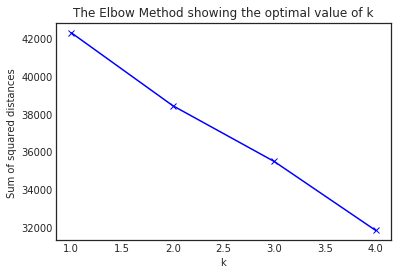

The minimum sum of sqaures of distances is : 31873.4816753  for k 4


In [57]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.977626681585 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 46140.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 42323.2094014

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1      2
infected#       16.00  1907.00    0.0
uninfected#      1.00  1921.00    1.0
infected%       94.12    49.82    0.0
uninfected%      5.88    50.18  100.0

Sum of square of distances is: 39337.0520568

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1217.00   706.00    0.0    0.0
uninfected#      334.00  1587.00    1.0    1.0
infected%         78.47    30.79    0.0    0.0
uninfected%       21.53    69.21  100.0  100.0

Sum of square of distances is: 35679.8822425

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



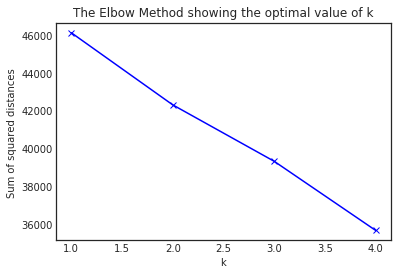

The minimum sum of sqaures of distances is : 35679.8822425  for k 4


In [58]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.980948185529 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     1923.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 49985.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1923.00    0.0
uninfected#     1922.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 46166.9421574

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     1921.00    1.0    1.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 42323.1345997

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1235.00   688.00    0.0    0.0
uninfected#      339.00  1582.00    1.0    1.0
infected%         78.46    30.31    0.0    0.0
uninfected%       21.54    69.69  100.0  100.0

Sum of square of distances is: 39521.4541658

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



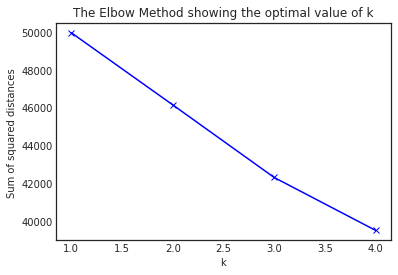

The minimum sum of sqaures of distances is : 39521.4541658  for k 4


In [59]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

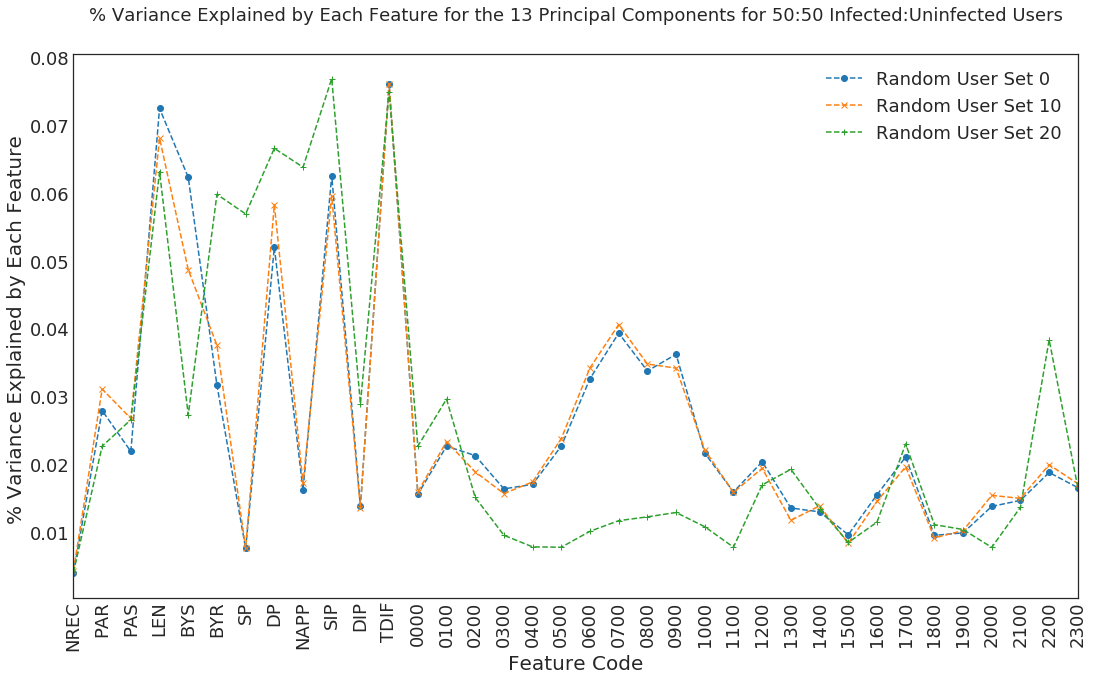

In [60]:
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data_50_0.std(axis=0)), '--o', label = 'Random User Set 0')
plt.plot(np.square(pca_inv_data_50_10.std(axis=0)), '--x', label = 'Random User Set 10')
plt.plot(np.square(pca_inv_data_50_20.std(axis=0)), '--+', label = 'Random User Set 20')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Variance Explained by Each Feature for the 13 Principal Components for 50:50 Infected:Uninfected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

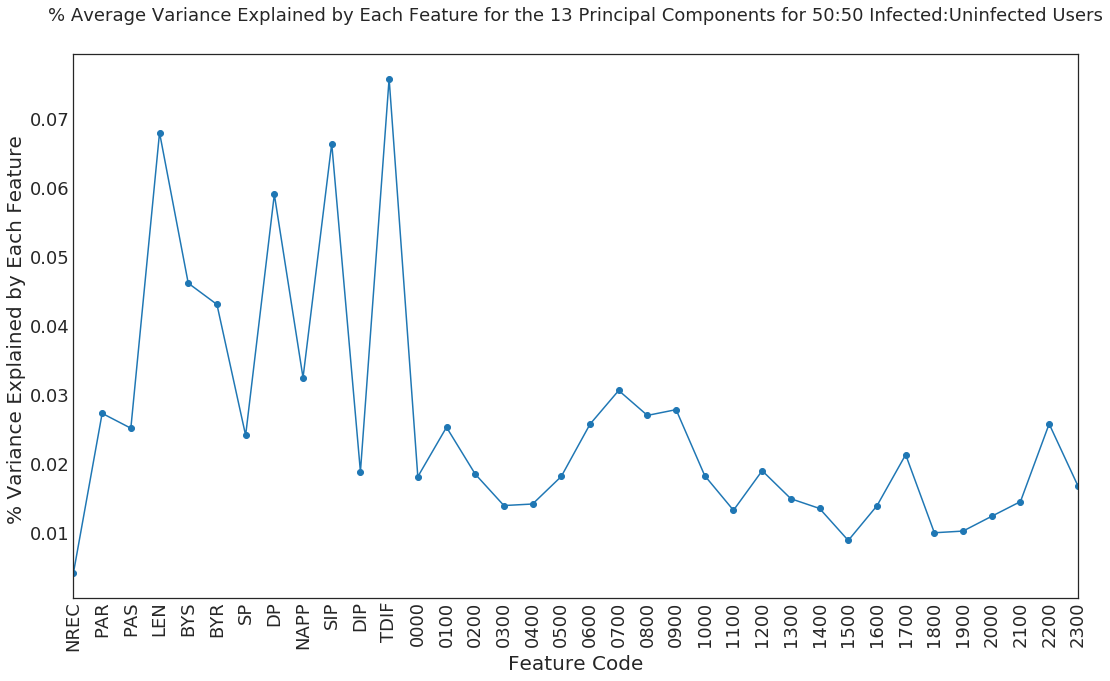

In [61]:
avg_variance_50=np.square(pca_inv_data_50_0.std(axis=0))+np.square(pca_inv_data_50_10.std(axis=0))+np.square(pca_inv_data_50_20.std(axis=0))

avg_variance_50=avg_variance_50/3

sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(avg_variance_50, '-o')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Average Variance Explained by Each Feature for the 13 Principal Components for 50:50 Infected:Uninfected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

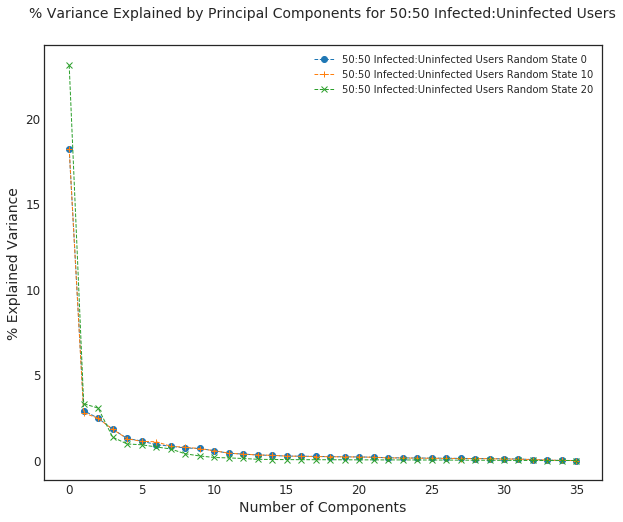

In [62]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_50_0, '--o', linewidth=1,alpha=1,label='50:50 Infected:Uninfected Users Random State 0')
plt.plot(pca_explained_variance_50_10,'--+', linewidth=1,alpha=1,label='50:50 Infected:Uninfected Users Random State 10')
plt.plot(pca_explained_variance_50_20,'--x', linewidth=1,alpha=1,label='50:50 Infected:Uninfected Users Random State 20')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Infected:Uninfected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


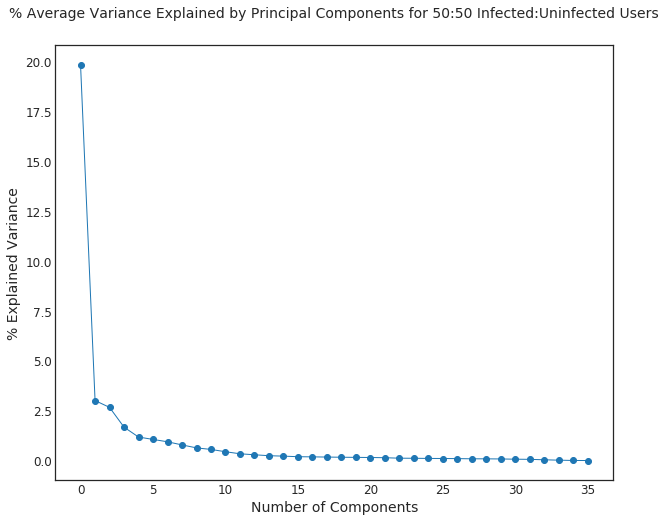

In [63]:
pca_explained_variance_50_avg=pca_explained_variance_50_0+pca_explained_variance_50_10+pca_explained_variance_50_20
pca_explained_variance_50_avg=pca_explained_variance_50_avg/3

sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_50_avg, '-o', linewidth=1,alpha=1)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Average Variance Explained by Principal Components for 50:50 Infected:Uninfected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 30:70 Infected:Uninfected Users</a></h2>
### 2.1  <a id='2.1' style="text-decoration : none; color : #000000;"> </a>Random State 0

In [64]:
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_0.csv',index_col='Source_User')

print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

### Feature Set

In [65]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']

### Feature Code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC        PAR  \
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...   441  46.138322   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...   254  24.370079   

                                                          PAS        LEN  \
Source_User                                                                
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  29.460317  66.585034   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  21.968504  33.976378   

                                                            BYS           BYR  \
Source_User                                                                     
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  4755.390023  54162.571429   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  3180.610236  25776.055118   

                                                       SP   DP  NAPP  SIP  \
Source_User                                                                 
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  438.0  6.0    21   25   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  252.0  4.0    12    2   

                                                    DIP          TDIF  0000  \
Source_User                                                                   
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  132  10734.321995    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  108   1006.488189     0   

                                                    0100  0200  0300  0400  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    15     2     0     1   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0     0   

                                                    0500  0600  0700  0800  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     1     6    19    15   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     6   231   

                                                    0900  1000  1100  1200  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     9    12    18    18   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     1     3     1     2   

                                                    1300  1400  1500  1600  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    21    33    49    86   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     2     1     3     1   

                                                    1700  1800  1900  2000  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    72    13     4    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     3     0     0     0   

                                                    2100  2200  2300  
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    11     2     6  
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0

In [66]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [67]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[-0.57732844, -0.29501235, -0.24729145, -0.39278869, -0.18239917,
        -0.27116486, -0.63222939, -0.11693585, -0.45253749, -0.45781167,
        -0.58184646, -0.11715866, -0.4818506 , -0.44347243, -0.46155063,
        -0.44383329, -0.42312079, -0.41073228, -0.36942814, -0.37732036,
        -0.47219302, -0.62777919, -0.64552208, -0.59641121, -0.63021654,
        -0.56504314, -0.40538961, -0.22912208,  0.08796476, -0.06000051,
        -0.56358338, -0.58439019, -0.52590208, -0.52672785, -0.57195034,
        -0.5517786 ],
       [-0.65060596, -0.36502923, -0.29150149, -0.7637577 , -0.20997258,
        -0.33982594, -0.72885918, -0.12649691, -1.03231691, -1.33995164,
        -0.62413538, -0.27332545, -0.57310425, -0.52952528, -0.47212086,
        -0.44383329, -0.42808466, -0.41587645, -0.39926772, -0.46129451,
         1.33912673, -0.70760432, -0.75125824, -0.78743964, -0.82339271,
        -0.78213775, -0.74848595, -0.72129738, -0.71721636, -0.62549711,
        -0.66810003, -0.61437

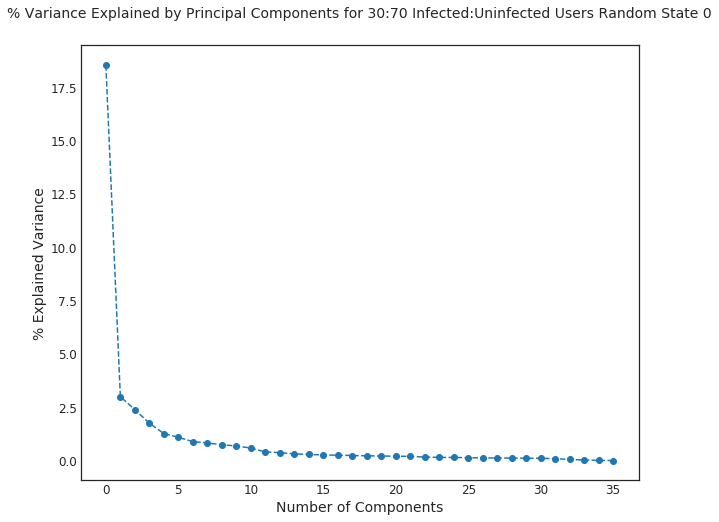

In [68]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 30:70 Infected:Uninfected Users Random State 0',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [69]:
pca_explained_variance_70_0=pca.explained_variance_

In [70]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.90269079243


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.230136  0.024294  0.015187 -0.001849  0.008558  0.023941  0.223418   
PC-2  -0.006933  0.553253  0.547060  0.096449  0.294831  0.537871  0.003000   
PC-3   0.071435 -0.032661 -0.038216  0.128348 -0.027688 -0.031010  0.052907   
PC-4   0.030363 -0.002294 -0.021592 -0.027701 -0.046847  0.001132 -0.017871   
PC-5  -0.001843 -0.001871  0.008881  0.528009 -0.023585 -0.003354 -0.116056   
PC-6   0.052694  0.031312  0.039153 -0.441684  0.055045  0.033498  0.027916   
PC-7   0.000952 -0.237197  0.093506 -0.055018  0.895466 -0.332060 -0.022959   
PC-8   0.023062  0.024803  0.013874 -0.079484 -0.064237  0.034222 -0.070375   
PC-9  -0.028087  0.065048  0.018945 -0.687213 -0.066692  0.083922 -0.089481   
PC-10 -0.004985  0.014622 -0.005709 -0.030404 -0.040800  0.017987 -0.028033   
PC-11 -0.007484  0.002938 -0.017186 -0.115261 -0.000937  0.005397 -0.005083   
PC-12 -0.001297  0.004790 -0.010700 -0.006292 -0.001403  0.004604  0.003332   
PC-13 -0.009556 -0.000882 -0.010592  0.012262  0.007134 -0.000870  0.060150   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.074441  0.186617  0.111665  0.210546 -0.051963  0.193130  0.180786   
PC-2  -0.007608  0.028358  0.007440  0.001530 -0.011342  0.006677  0.018061   
PC-3   0.226977 -0.095250 -0.159554  0.100348  0.074601  0.029840  0.159952   
PC-4  -0.156589 -0.086447 -0.174896 -0.077528  0.118144  0.245111  0.262171   
PC-5   0.475741 -0.260938 -0.307207  0.120977  0.379832 -0.060200 -0.126943   
PC-6  -0.357914 -0.202330 -0.369507 -0.181613  0.492465 -0.054505 -0.100778   
PC-7   0.087068 -0.020183  0.002853  0.017222 -0.036439 -0.006657  0.002214   
PC-8   0.062344 -0.154140 -0.247425 -0.062758 -0.684716 -0.143110 -0.168938   
PC-9   0.587712 -0.026326 -0.105668  0.223002  0.043981 -0.019348  0.019047   
PC-10  0.010255  0.129795  0.556551 -0.039778  0.326626 -0.219416 -0.129027   
PC-11  0.239652  0.114843  0.357485  0.109956  0.072085  0.137053 -0.031181   
PC-12  0.031622  0.033818 -0.021806  0.013019  0.008388 -0.077524  0.067964   
PC-13  0.020150  0.104250 -0.125501  0.083165  0.016058  0.114188  0.280250   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.165998  0.164049  0.166742  0.162107  0.143719  0.149341  0.152645   
PC-2   0.021184  0.022937  0.012731  0.008565 -0.003460 -0.013561 -0.017333   
PC-3   0.262574  0.342233  0.370172  0.371281  0.321880  0.154064  0.033391   
PC-4   0.250245  0.173167  0.057961 -0.065638 -0.216487 -0.350877 -0.397844   
PC-5  -0.148069 -0.137540 -0.064436 -0.036633 -0.030069  0.011672 -0.002628   
PC-6  -0.089107 -0.022371  0.020855  0.092019  0.192980  0.225993  0.197955   
PC-7   0.005812  0.006389  0.015744  0.018286  0.000182 -0.034704 -0.037705   
PC-8  -0.114156 -0.018167  0.057364  0.121675  0.185236  0.131070 -0.004730   
PC-9  -0.009055  0.008066  0.013636 -0.029285 -0.112347 -0.131392 -0.128396   
PC-10 -0.029308  0.068428  0.121205  0.162787  0.175813  0.004683 -0.175010   
PC-11 -0.094456 -0.143895 -0.124567 -0.079628 -0.002205  0.202668  0.178620   
PC-12  0.276178  0.215271  0.062719 -0.144627 -0.365202 -0.177495  0.371302   
PC-13  0.177433 -0.052475 -0.269737 -0.310177 -0.039550  0.495453  0.224959   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.168879  0.176302  0.182905  0.185165  0.194213  0.187922  0.192683   
PC-2  -0.025584 -0.022007 -0.016052 -0.017376 -0.022688 -0.026071 -0.025900   
PC-3  -0.072630 -0.104296 -0.092633 -0.121928 -0.129461 -0.184039 -0.158423   
PC-4  -0.329336 -0.252604 -0.172189 -0.115260 -0.047028  0.023155  0.023740   
PC-5   0.014098  0.004225 -0.021126 -0.026838  0.048586  0.078583  0.081550   
PC-6   0.088181 -0.002716 -0.033539 -0.077937 -0.036359 -0.002736 -0.006447   
PC-7  -0.030502 -0.036288 -0.022397 -0.005061 -0.001967  0.018583  0.011321   
PC-8  -0.113573 -0.182414 -0.191361 -0.181728 -0.058766  0

In [71]:
pca_inv_data_70_0=pca.components_
pca_data_70_0=m

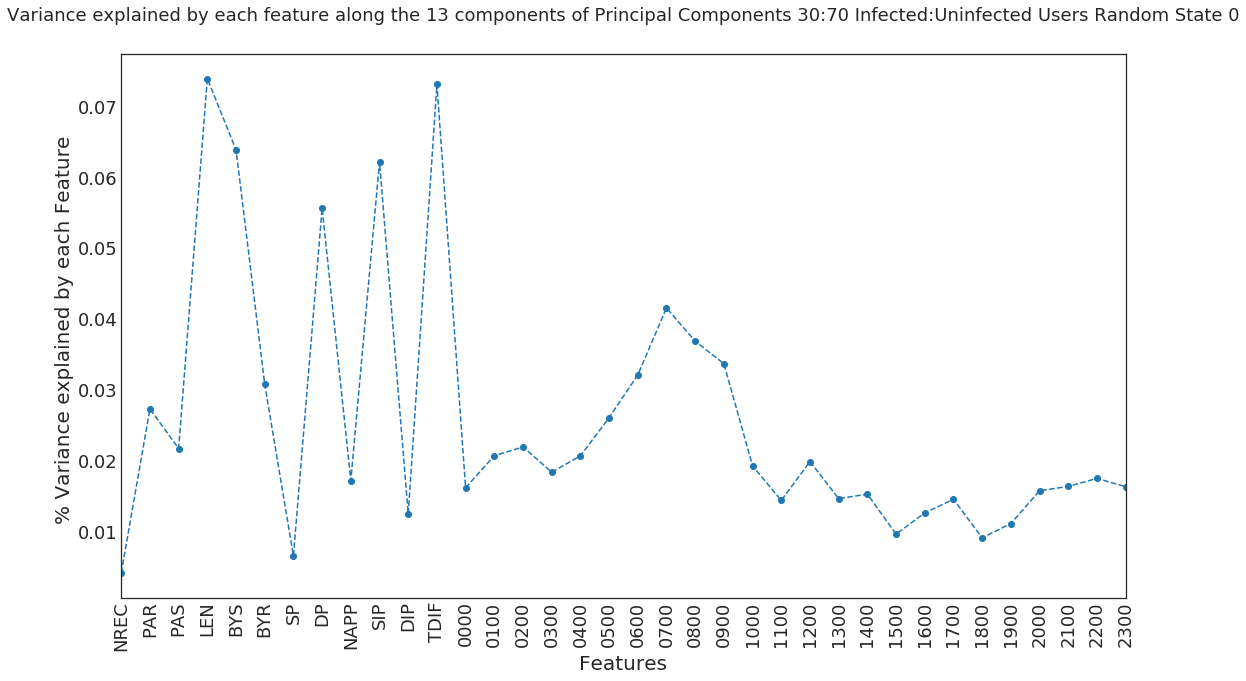

In [72]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 30:70 Infected:Uninfected Users Random State 0',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 70:30 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 1.14147454574e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1921.00   2.00
uninfected#     4477.00  10.00
infected%         30.03  16.67
uninfected%       69.97  83.33

Sum of square of distances is: 5.39137001964e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
infected#       1775.0   2.00  146.00
uninfected#     4263.0  10.00  214.00
infected%         29.4  16.67   40.56
uninfected%       70.6  83.33   59.44

Sum of square of distances is: 3.25062094246e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2      3
infected#       1733.00    0.0  186.00   4.00
uninfected#     4206.00    3.0  268.00  10.00
infected%         29.18    0.0   40.97  28.57
uninfected%       70.82  100.0   59.03  71.43

Sum of square of distances is: 1.90117486484e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



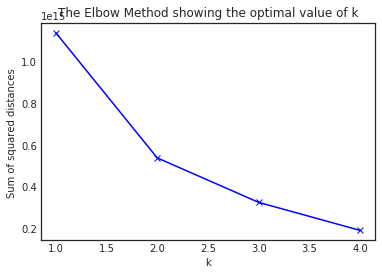

The minimum sum of sqaures of distances is : 1.90117486484e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [73]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 230760.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1
infected#        722.0  1201.00
uninfected#     3818.0   669.00
infected%         15.9    64.22
uninfected%       84.1    35.78

Sum of square of distances is: 156516.753442

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2
infected#       1096.00   495.00  332.00
uninfected#      842.00  3550.00   95.00
infected%         56.55    12.24   77.75
uninfected%       43.45    87.76   22.25

Sum of square of distances is: 136924.210521

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2      3
infected#        489.00  356.00  1077.00    1.0
uninfected#     3537.00  110.00   840.00    0.0
infected%         12.15   76.39    56.18  100.0
uninfected%       87.85   23.61    43.82    0.0

Sum of square of distances is: 125920.569345

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



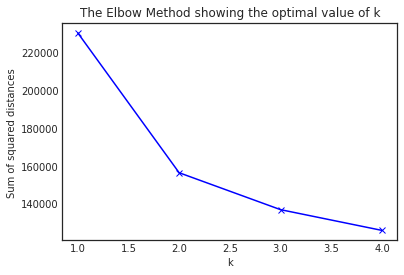

The minimum sum of sqaures of distances is : 125920.569345  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [74]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.664097782533 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 19227.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
infected#        690.00  1233.0
uninfected#     3772.00   715.0
infected%         15.46    63.3
uninfected%       84.54    36.7

Sum of square of distances is: 15170.3735387

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1220.00   699.00   4.00
uninfected#      688.00  3786.00  13.00
infected%         63.94    15.59  23.53
uninfected%       36.06    84.41  76.47

Sum of square of distances is: 11709.8803883

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2        3
infected#       144.00   706.00   4.00  1069.00
uninfected#      59.00  3771.00  13.00   644.00
infected%        70.94    15.77  23.53    62.41
uninfected%      29.06    84.23  76.47    37.59

Sum of square of distances is: 8568.82893318

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



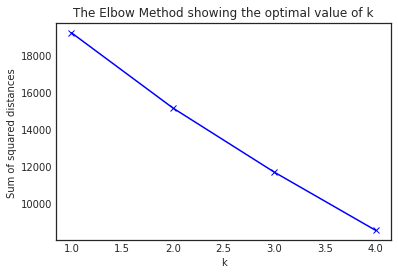

The minimum sum of sqaures of distances is : 8568.82893318  for k 4


In [75]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.712677726485 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 25636.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1251.00   672.00
uninfected#      734.00  3753.00
infected%         63.02    15.19
uninfected%       36.98    84.81

Sum of square of distances is: 21575.4591007

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        695.00  1225.00   3.00
uninfected#     3777.00   697.00  13.00
infected%         15.54    63.74  18.75
uninfected%       84.46    36.26  81.25

Sum of square of distances is: 18112.6391776

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2       3
infected#        707.00  1065.00   4.00  147.00
uninfected#     3730.00   685.00  13.00   59.00
infected%         15.93    60.86  23.53   71.36
uninfected%       84.07    39.14  76.47   28.64

Sum of square of distances is: 14918.1801271

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



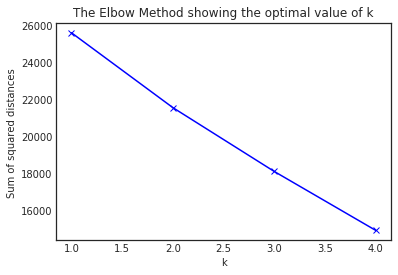

The minimum sum of sqaures of distances is : 14918.1801271  for k 4


In [76]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.747774619073 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 32045.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1323.00   600.00
uninfected#      830.00  3657.00
infected%         61.45    14.09
uninfected%       38.55    85.91

Sum of square of distances is: 27858.1245465

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2
infected#        580.00  1322.00  21.0
uninfected#     3616.00   850.00  21.0
infected%         13.82    60.87  50.0
uninfected%       86.18    39.13  50.0

Sum of square of distances is: 24567.1196909

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1        2      3
infected#       21.00   591.00  1308.00   3.00
uninfected#     20.00  3633.00   821.00  13.00
infected%       51.22    13.99    61.44  18.75
uninfected%     48.78    86.01    38.56  81.25

Sum of square of distances is: 21155.8509633

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



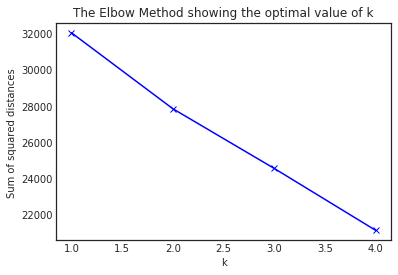

The minimum sum of sqaures of distances is : 21155.8509633  for k 4


In [77]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.778028802881 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 38454.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1346.00   577.00
uninfected#      869.00  3618.00
infected%         60.77    13.75
uninfected%       39.23    86.25

Sum of square of distances is: 34258.1567534

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#        570.00  18.00  1335.00
uninfected#     3619.00  13.00   855.00
infected%         13.61  58.06    60.96
uninfected%       86.39  41.94    39.04

Sum of square of distances is: 30315.3345864

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
infected#        601.0  419.00  886.00  17.00
uninfected#     3544.0  229.00  701.00  13.00
infected%         14.5   64.66   55.83  56.67
uninfected%       85.5   35.34   44.17  43.33

Sum of square of distances is: 27291.7867906

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



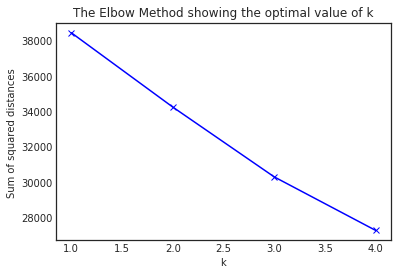

The minimum sum of sqaures of distances is : 27291.7867906  for k 4


In [78]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.846029776013 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 57681.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1908.00  15.00
uninfected#     4483.00   4.00
infected%         29.85  78.95
uninfected%       70.15  21.05

Sum of square of distances is: 52915.5036863

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1908.00    0.0  15.00
uninfected#     4429.00   54.0   4.00
infected%         30.11    0.0  78.95
uninfected%       69.89  100.0  21.05

Sum of square of distances is: 49290.1402825

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2      3
infected#        568.00  1334.00  16.0   5.00
uninfected#     3533.00   941.00   4.0   9.00
infected%         13.85    58.64  80.0  35.71
uninfected%       86.15    41.36  20.0  64.29

Sum of square of distances is: 44883.4709069

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



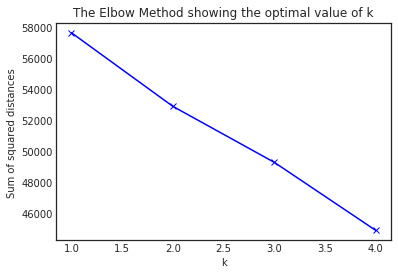

The minimum sum of sqaures of distances is : 44883.4709069  for k 4


In [79]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.881214422643 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 70499.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1316.00   607.00
uninfected#      835.00  3652.00
infected%         61.18    14.25
uninfected%       38.82    85.75

Sum of square of distances is: 66010.9938022

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2
infected#        601.00  1306.0  16.0
uninfected#     3655.00   828.0   4.0
infected%         14.12    61.2  80.0
uninfected%       85.88    38.8  20.0

Sum of square of distances is: 61047.5791835

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2      3
infected#        598.00  1306.0  16.0   3.00
uninfected#     3652.00   821.0   4.0  10.00
infected%         14.07    61.4  80.0  23.08
uninfected%       85.93    38.6  20.0  76.92

Sum of square of distances is: 57490.6308893

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



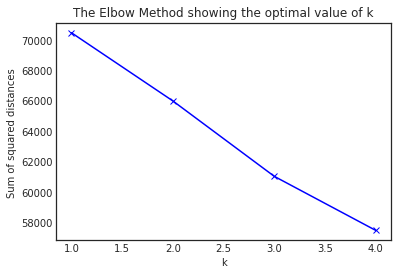

The minimum sum of sqaures of distances is : 57490.6308893  for k 4


In [80]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.892354960295 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 76908.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
infected#       1907.00  16.0
uninfected#     4483.00   4.0
infected%         29.84  80.0
uninfected%       70.16  20.0

Sum of square of distances is: 71903.1796559

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1        2
infected#        613.00  16.0  1294.00
uninfected#     3671.00   4.0   812.00
infected%         14.31  80.0    61.44
uninfected%       85.69  20.0    38.56

Sum of square of distances is: 67435.5107861

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0     1        2      3
infected#        655.0  16.0  1252.00    0.0
uninfected#     3653.0   4.0   778.00   52.0
infected%         15.2  80.0    61.67    0.0
uninfected%       84.8  20.0    38.33  100.0

Sum of square of distances is: 63452.81622

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



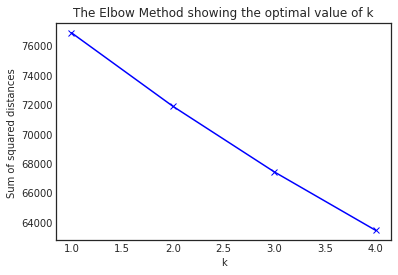

The minimum sum of sqaures of distances is : 63452.81622  for k 4


In [81]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.90269079243 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 83317.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
infected#       1907.00  16.0
uninfected#     4483.00   4.0
infected%         29.84  80.0
uninfected%       70.16  20.0

Sum of square of distances is: 78312.2005128

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2
infected#       1283.00   624.00  16.0
uninfected#      812.00  3671.00   4.0
infected%         61.24    14.53  80.0
uninfected%       38.76    85.47  20.0

Sum of square of distances is: 73811.5368292

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1        2      3
infected#        424.00  16.0  1483.00    0.0
uninfected#     3053.00   4.0  1377.00   53.0
infected%         12.19  80.0    51.85    0.0
uninfected%       87.81  20.0    48.15  100.0

Sum of square of distances is: 69920.4547586

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



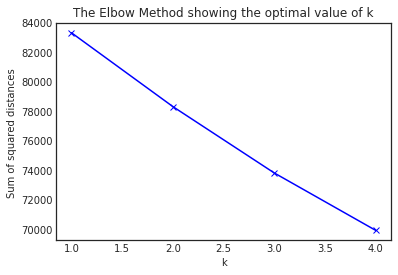

The minimum sum of sqaures of distances is : 69920.4547586  for k 4


In [82]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 2.2  <a id='2.2' style="text-decoration : none; color : #000000;"> Random State 10</a>

In [83]:
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_10.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

### Feature Set

In [84]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC         PAR  \
Source_User                                                            
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  5164  438.195198   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  1347  462.677060   

                                                           PAS         LEN  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  231.486445  116.998644   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  125.536748   90.790646   

                                                             BYS  \
Source_User                                                        
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  25566.860767   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  13083.769859   

                                                              BYR      SP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  578623.737026  4106.0   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  633355.270973  1269.0   

                                                      DP  NAPP  SIP   DIP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  42.0    54   69  1296   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  14.0    38   39   396   

                                                           TDIF  0000  0100  \
Source_User                                                                   
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   952.221340   521   405   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  3335.414996    63    65   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   398   211   281   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...   145   123   147    56   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   163   170    68    59   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    61    73    32    19   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...    36    74    99   142   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    19     6    26    52   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   201   218   307   284   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    33   135    75    21   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   219   257   223   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    24    23    15    28   

                                                    2200  2300  
Source_User                                                     
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   173   205  
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    56    50

In [85]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [86]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 1.24909243,  1.0030051 ,  0.8250214 ,  0.13213513,  0.05946084,
         1.03440183,  1.25227919,  0.06291956,  1.64788263,  1.21071582,
         1.48823759, -0.29814652,  2.79265669,  1.77407123,  1.64180877,
         0.62411112,  0.90485662,  0.69484483,  0.42689509,  0.61256328,
        -0.03970757, -0.14205009, -0.37963997,  0.01447248,  0.31332957,
         0.7837301 ,  1.37510645,  1.55681508,  2.18943922,  1.63657414,
         1.06981735,  1.32757867,  1.01599658,  0.94185018,  0.58561253,
         0.73574056],
       [-0.23084657,  1.08479862,  0.2718146 , -0.10134245, -0.03152462,
         1.17144017, -0.21046754, -0.08038284,  0.62185137,  0.06787511,
        -0.12410602, -0.25482949, -0.1693227 , -0.15613561,  0.29768578,
         0.17988576,  0.27305514, -0.1398887 , -0.09937886, -0.02975054,
        -0.34402236, -0.53812263, -0.57552136, -0.73021718, -0.53877375,
        -0.22087124, -0.41358185,  0.67838529, -0.02171725, -0.47971398,
        -0.47308162, -0.45514

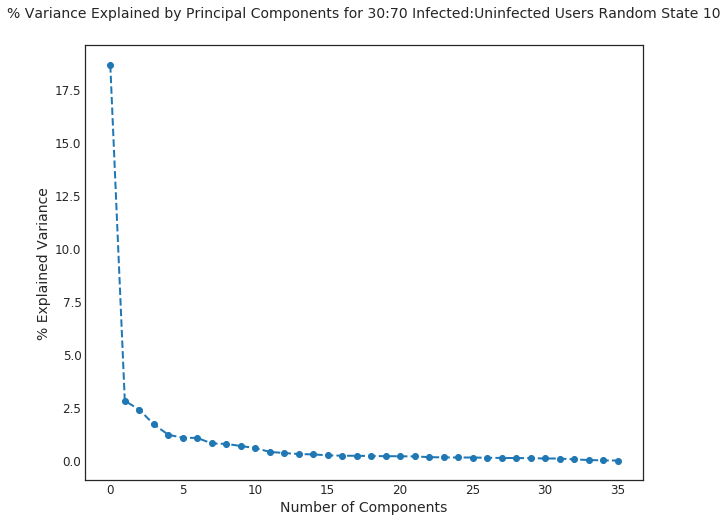

In [87]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 30:70 Infected:Uninfected Users Random State 10',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [88]:
pca_explained_variance_70_10=pca.explained_variance_

In [89]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.903941813185


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.229364  0.022080  0.010221 -0.004790  0.002267  0.021854  0.222772   
PC-2  -0.008177  0.563089  0.553884  0.011098  0.303232  0.526114  0.002269   
PC-3   0.074478  0.001048 -0.009956  0.110637 -0.016603  0.003374  0.052626   
PC-4   0.026533 -0.007757 -0.040886 -0.003896 -0.057835  0.001454 -0.020323   
PC-5   0.005122 -0.015244  0.062435  0.502408  0.108261 -0.035440 -0.100128   
PC-6   0.007444 -0.284553  0.247037 -0.083290  0.805933 -0.429307  0.005051   
PC-7  -0.051404 -0.023257 -0.016048  0.526393  0.008758 -0.027250 -0.029358   
PC-8   0.015084 -0.017530 -0.008361  0.604541  0.007623 -0.025076  0.120989   
PC-9   0.032313  0.003827  0.002270  0.277790 -0.005409  0.007416 -0.033199   
PC-10 -0.004709  0.014770 -0.007563 -0.021191 -0.045351  0.020244 -0.031859   
PC-11  0.008678  0.012658  0.011237  0.081218 -0.014725  0.016746  0.002836   
PC-12 -0.003068  0.000248 -0.009023 -0.001857  0.002853 -0.001676  0.018532   
PC-13  0.010939  0.001404  0.002081 -0.013202 -0.013726  0.002412 -0.077995   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.072531  0.186642  0.111676  0.210586 -0.056349  0.192308  0.181222   
PC-2  -0.021328  0.032340  0.016303 -0.000987 -0.012616  0.012345  0.013441   
PC-3   0.226914 -0.095688 -0.162410  0.090465  0.080109  0.046999  0.162251   
PC-4  -0.155193 -0.079949 -0.166731 -0.058426  0.126847  0.251709  0.259115   
PC-5   0.395058 -0.267398 -0.350026  0.083019  0.471943 -0.062037 -0.109595   
PC-6  -0.053457 -0.000352  0.054283 -0.023314 -0.038039  0.011748  0.028136   
PC-7   0.411718  0.185798  0.342984  0.197884 -0.437477  0.050157  0.082693   
PC-8  -0.605144  0.113926  0.213024 -0.170526  0.260831  0.074641  0.060571   
PC-9  -0.226347 -0.130118 -0.207925 -0.165866 -0.589070 -0.134302 -0.166087   
PC-10  0.013650  0.110664  0.524520 -0.047258  0.354449 -0.210917 -0.134206   
PC-11 -0.186741 -0.134096 -0.353445 -0.109630 -0.096860 -0.113458  0.042954   
PC-12  0.024548  0.050022 -0.035476  0.015511  0.012840 -0.030773  0.119874   
PC-13  0.036086 -0.097304  0.143617 -0.063202 -0.018196 -0.166740 -0.295305   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.167717  0.163617  0.163341  0.159454  0.145673  0.150433  0.154798   
PC-2   0.012561  0.010272 -0.001661 -0.008723 -0.020171 -0.025871 -0.023968   
PC-3   0.270620  0.349054  0.371879  0.375438  0.318358  0.142546  0.018240   
PC-4   0.231790  0.143241  0.034100 -0.082110 -0.219224 -0.372498 -0.401583   
PC-5  -0.139981 -0.125959 -0.069376 -0.042204 -0.012073  0.046347  0.042187   
PC-6   0.035994  0.034971  0.032785  0.026488  0.011440 -0.030629 -0.037612   
PC-7   0.059530  0.006092 -0.036840 -0.099100 -0.171042 -0.203961 -0.167109   
PC-8   0.066020  0.021942 -0.012637 -0.006823  0.019023  0.056568  0.107135   
PC-9  -0.095982 -0.018243  0.057636  0.132189  0.214351  0.166282  0.022049   
PC-10 -0.026481  0.069577  0.134368  0.162215  0.164729 -0.027160 -0.198112   
PC-11  0.112863  0.165704  0.144612  0.079445 -0.054187 -0.261143 -0.189949   
PC-12  0.288914  0.229383  0.030130 -0.209723 -0.420688 -0.033529  0.407956   
PC-13 -0.088998  0.084338  0.269790  0.249759 -0.058234 -0.492979 -0.111468   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.170932  0.178952  0.182561  0.184716  0.192980  0.189046  0.192726   
PC-2  -0.023904 -0.020742 -0.015487 -0.014678 -0.019330 -0.019529 -0.016906   
PC-3  -0.092596 -0.113965 -0.113799 -0.135147 -0.143115 -0.190163 -0.148331   
PC-4  -0.321990 -0.244189 -0.181747 -0.099303 -0.032991  0.037123  0.025993   
PC-5   0.044939  0.018591  0.004524 -0.009261  0.053778  0.080970  0.073157   
PC-6  -0.024751 -0.016281 -0.011849 -0.004563 -0.000026  0.007435 -0.002487   
PC-7  -0.093844 -0.012850  0.022331  0.063592  0.025645 -0.003828  0.008038   
PC-8   0.090133  0.072656  0.038266  0.022170 -0.050648 -0

In [90]:
pca_inv_data_70_10=pca.components_
pca_data_70_10=m

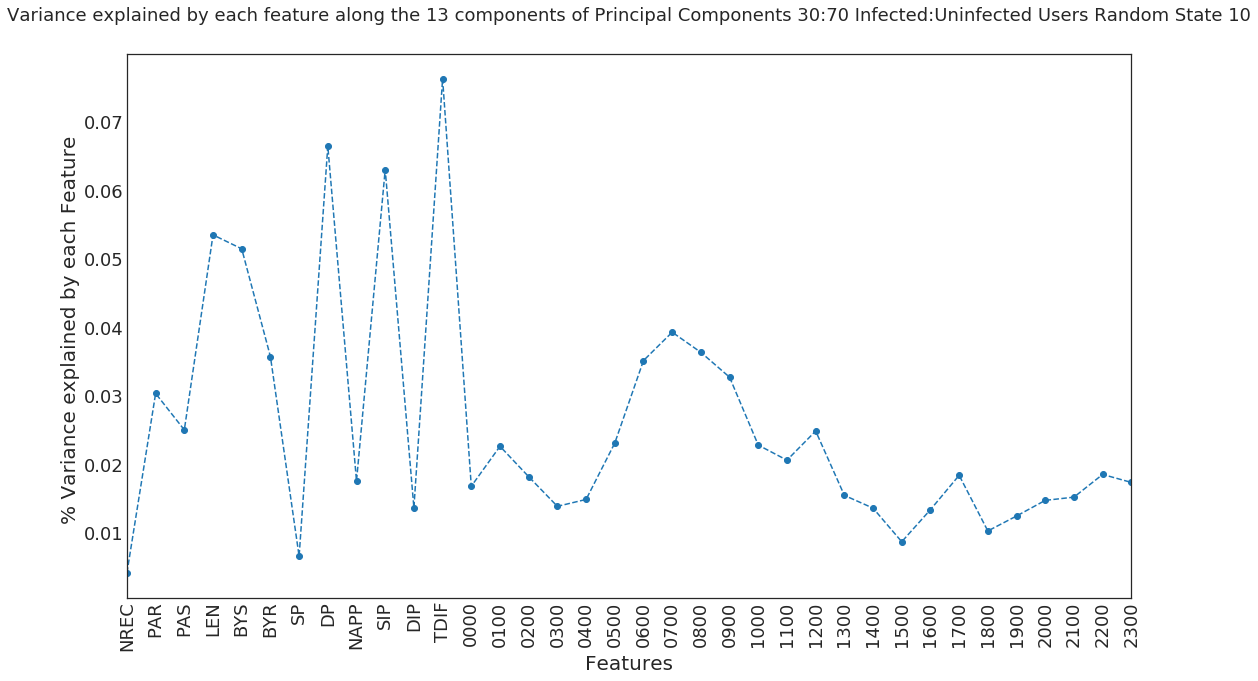

In [91]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 30:70 Infected:Uninfected Users Random State 10',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 1.16260070976e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
infected#       1919.00   4.0
uninfected#     4475.00  12.0
infected%         30.01  25.0
uninfected%       69.99  75.0

Sum of square of distances is: 5.9510992279e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
infected#       1793.00   2.00  128.00
uninfected#     4304.00  11.00  172.00
infected%         29.41  15.38   42.67
uninfected%       70.59  84.62   57.33

Sum of square of distances is: 3.78202335892e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
infected#       327.00  1573.00   1.00  22.00
uninfected#     381.00  4054.00  10.00  42.00
infected%        46.19    27.95   9.09  34.38
uninfected%      53.81    72.05  90.91  65.62

Sum of square of distances is: 2.90003467133e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



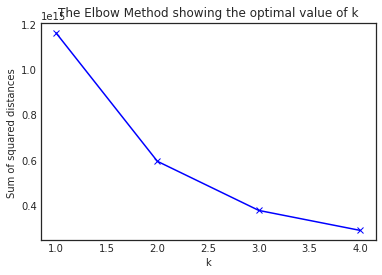

The minimum sum of sqaures of distances is : 2.90003467133e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [92]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 230760.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        741.00  1182.00
uninfected#     3830.00   657.00
infected%         16.21    64.27
uninfected%       83.79    35.73

Sum of square of distances is: 156102.67989

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1        2
infected#       343.00   493.00  1087.00
uninfected#     111.00  3510.00   866.00
infected%        75.55    12.32    55.66
uninfected%      24.45    87.68    44.34

Sum of square of distances is: 136800.68189

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2      3
infected#        416.00  534.00  938.00  35.00
uninfected#     3382.00  208.00  888.00   9.00
infected%         10.95   71.97   51.37  79.55
uninfected%       89.05   28.03   48.63  20.45

Sum of square of distances is: 125433.072583

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



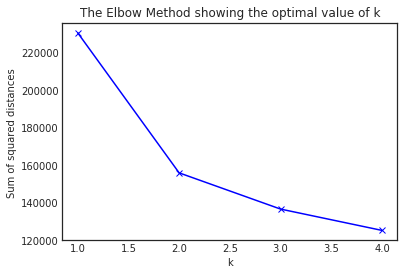

The minimum sum of sqaures of distances is : 125433.072583  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [93]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.662695119084 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 19227.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        718.00  1205.00
uninfected#     3774.00   713.00
infected%         15.98    62.83
uninfected%       84.02    37.17

Sum of square of distances is: 15169.9976917

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1201.00   718.00   4.00
uninfected#      682.00  3787.00  18.00
infected%         63.78    15.94  18.18
uninfected%       36.22    84.06  81.82

Sum of square of distances is: 11565.5786495

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2        3
infected#       147.00   713.00   4.00  1059.00
uninfected#      67.00  3719.00  18.00   683.00
infected%        68.69    16.09  18.18    60.79
uninfected%      31.31    83.91  81.82    39.21

Sum of square of distances is: 8415.08957941

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



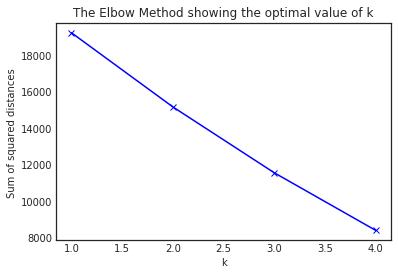

The minimum sum of sqaures of distances is : 8415.08957941  for k 4


In [94]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.710050070128 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 25636.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1226.00   697.00
uninfected#      733.00  3754.00
infected%         62.58    15.66
uninfected%       37.42    84.34

Sum of square of distances is: 21577.8996682

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        717.00  1202.00   4.00
uninfected#     3782.00   687.00  18.00
infected%         15.94    63.63  18.18
uninfected%       84.06    36.37  81.82

Sum of square of distances is: 17968.2312957

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2      3
infected#        705.00  148.00  1066.0   4.00
uninfected#     3651.00   65.00   753.0  18.00
infected%         16.18   69.48    58.6  18.18
uninfected%       83.82   30.52    41.4  81.82

Sum of square of distances is: 14765.0874862

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



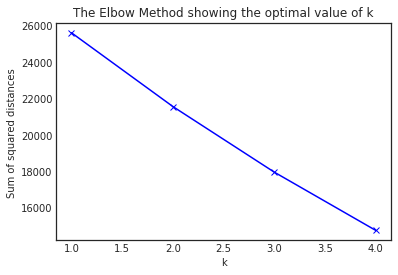

The minimum sum of sqaures of distances is : 14765.0874862  for k 4


In [95]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.743876516525 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 32045.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
infected#        613.00  1310.0
uninfected#     3660.00   827.0
infected%         14.35    61.3
uninfected%       85.65    38.7

Sum of square of distances is: 27902.6629137

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1298.00   621.00   4.00
uninfected#      802.00  3667.00  18.00
infected%         61.81    14.48  18.18
uninfected%       38.19    85.52  81.82

Sum of square of distances is: 24265.5606944

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2      3
infected#        639.00  368.00  912.00   4.00
uninfected#     3533.00  187.00  749.00  18.00
infected%         15.32   66.31   54.91  18.18
uninfected%       84.68   33.69   45.09  81.82

Sum of square of distances is: 21075.6302802

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



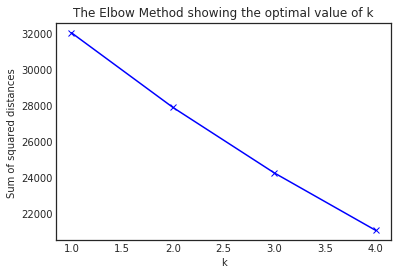

The minimum sum of sqaures of distances is : 21075.6302802  for k 4


In [96]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.773632351135 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 38454.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1299.00   624.00
uninfected#      821.00  3666.00
infected%         61.27    14.55
uninfected%       38.73    85.45

Sum of square of distances is: 34297.873203

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1305.00    0.0   618.00
uninfected#      823.00    1.0  3663.00
infected%         61.33    0.0    14.44
uninfected%       38.67  100.0    85.56

Sum of square of distances is: 30233.3233574

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1        2      3
infected#       910.00  377.00   636.00    0.0
uninfected#     740.00  222.00  3524.00    1.0
infected%        55.15   62.94    15.29    0.0
uninfected%      44.85   37.06    84.71  100.0

Sum of square of distances is: 27037.5518603

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



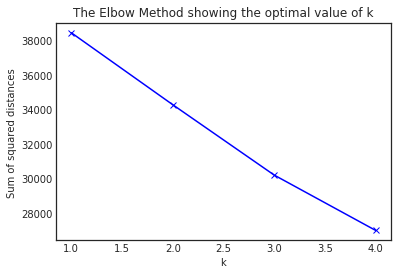

The minimum sum of sqaures of distances is : 27037.5518603  for k 4


In [97]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.847437028034 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 57681.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1315.00   608.00
uninfected#      911.00  3576.00
infected%         59.07    14.53
uninfected%       40.93    85.47

Sum of square of distances is: 53251.2538999

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1309.00   599.00  15.00
uninfected#      910.00  3576.00   1.00
infected%         58.99    14.35  93.75
uninfected%       41.01    85.65   6.25

Sum of square of distances is: 48504.3197357

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       1313.00    0.0   595.00  15.00
uninfected#      913.00    1.0  3572.00   1.00
infected%         58.98    0.0    14.28  93.75
uninfected%       41.02  100.0    85.72   6.25

Sum of square of distances is: 44437.6520589

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



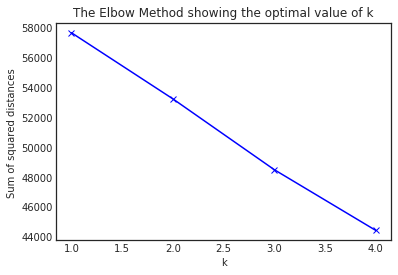

The minimum sum of sqaures of distances is : 44437.6520589  for k 4


In [98]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.882812875153 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 70499.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1319.00   604.00
uninfected#      869.00  3618.00
infected%         60.28    14.31
uninfected%       39.72    85.69

Sum of square of distances is: 65987.4481924

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
infected#        594.0  15.00  1314.00
uninfected#     3618.0   1.00   868.00
infected%         14.1  93.75    60.22
uninfected%       85.9   6.25    39.78

Sum of square of distances is: 61121.7991737

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2        3
infected#       730.00   296.00  15.00   882.00
uninfected#     399.00  2576.00   1.00  1511.00
infected%        64.66    10.31  93.75    36.86
uninfected%      35.34    89.69   6.25    63.14

Sum of square of distances is: 57728.1338225

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



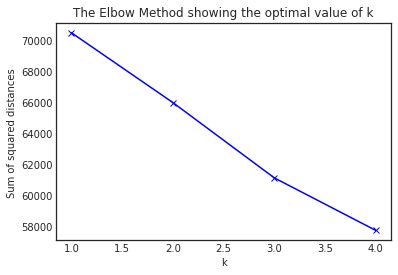

The minimum sum of sqaures of distances is : 57728.1338225  for k 4


In [99]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.894132333322 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 76908.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1907.00  16.00
uninfected#     4486.00   1.00
infected%         29.83  94.12
uninfected%       70.17   5.88

Sum of square of distances is: 72001.4725572

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#        601.00  16.00  1306.00
uninfected#     3612.00   1.00   874.00
infected%         14.27  94.12    59.91
uninfected%       85.73   5.88    40.09

Sum of square of distances is: 67502.8521729

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
infected#        597.0  1310.00    0.0  16.00
uninfected#     3607.0   878.00    1.0   1.00
infected%         14.2    59.87    0.0  94.12
uninfected%       85.8    40.13  100.0   5.88

Sum of square of distances is: 63430.9089927

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



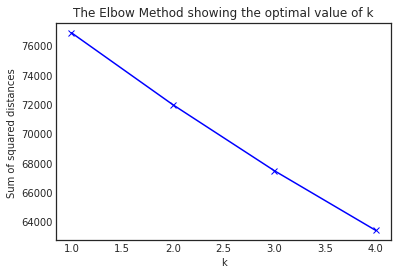

The minimum sum of sqaures of distances is : 63430.9089927  for k 4


In [100]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.903941813185 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 83317.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       1908.00  15.00
uninfected#     4486.00   1.00
infected%         29.84  93.75
uninfected%       70.16   6.25

Sum of square of distances is: 78415.8866082

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1309.00  15.00   599.00
uninfected#      879.00   1.00  3607.00
infected%         59.83  93.75    14.24
uninfected%       40.17   6.25    85.76

Sum of square of distances is: 73897.2810425

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1309.00   595.00   4.00  15.00
uninfected#      870.00  3598.00  18.00   1.00
infected%         60.07    14.19  18.18  93.75
uninfected%       39.93    85.81  81.82   6.25

Sum of square of distances is: 70170.8318031

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



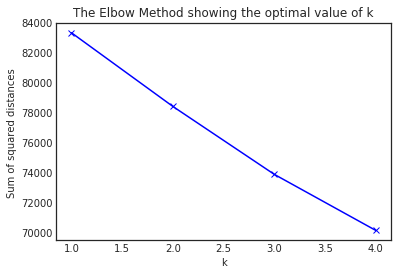

The minimum sum of sqaures of distances is : 70170.8318031  for k 4


In [101]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 2.3  <a id='2.3' style="text-decoration : none; color : #000000;"> Random State 20</a>

In [102]:
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_20.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

### Feature Set

In [103]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC         PAR  \
Source_User                                                            
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  1580  297.743038   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2071   92.849831   

                                                           PAS        LEN  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  121.938608  75.572152   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   68.084500  85.015451   

                                                             BYS  \
Source_User                                                        
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  10785.806962   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   9264.509416   

                                                              BYR      SP  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  373515.271519  1513.0   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  113797.491067  1908.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  12.0    30   34  415   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  18.0    44   58  538   

                                                           TDIF  0000  0100  \
Source_User                                                                   
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  2816.703797    18    34   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2378.489136   200   135   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    54    15    18    46   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    60    81    56   117   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    81    30    43    44   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    50    80   174    78   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    47    92    79    47   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   145    77    57    41   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    56    60    40   119   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    41    49    29    66   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    88   127   191   167   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    37    72    45   122   

                                                    2200  2300  
Source_User                                                     
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    45    39  
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    68   191

In [104]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [105]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[-0.04951859,  0.04118381, -0.0038536 , -0.16079778, -0.0142114 ,
         0.07579611, -0.07224384, -0.08891434,  0.13195489, -0.09757643,
        -0.08042542, -0.26528298, -0.29959533, -0.20123902, -0.08517829,
        -0.10158141, -0.07176328, -0.04024171, -0.01254115, -0.09501192,
        -0.0849334 , -0.11476996, -0.10346364,  0.06176774,  0.03820992,
        -0.15805865, -0.08997246, -0.05943861, -0.19535419,  0.1918098 ,
         0.0215522 ,  0.1981231 ,  0.40196995,  0.33543869, -0.23765743,
        -0.22956773],
       [ 0.00507141, -0.03521792, -0.01716274, -0.1073808 , -0.0145446 ,
        -0.03759542,  0.12928937, -0.05739949,  1.02911621,  0.82527845,
         0.14138184, -0.27322461,  0.45919314,  0.13312813, -0.07243718,
        -0.01872456, -0.03951581,  0.01218747, -0.04644248, -0.00768429,
         0.24633804,  0.00894452,  0.3345796 ,  0.00931818, -0.08798421,
        -0.19599415, -0.17103898, -0.11439844, -0.25162732, -0.07849759,
        -0.2315145 , -0.05343

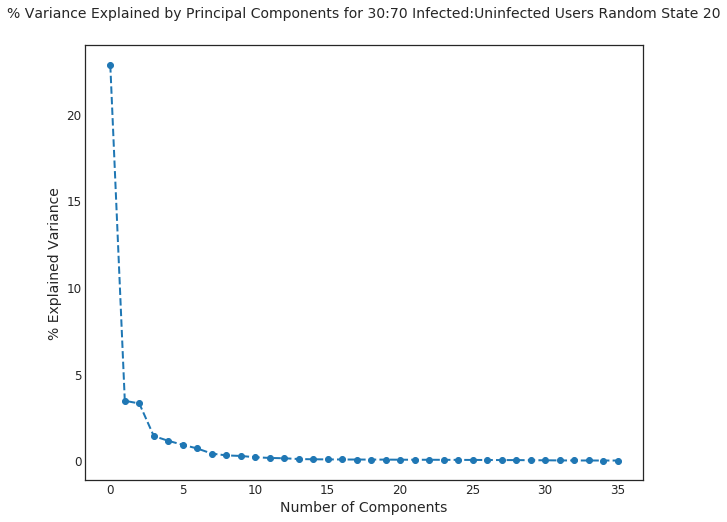

In [106]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 30:70 Infected:Uninfected Users Random State 20',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [107]:
pca_explained_variance_70_20=pca.explained_variance_

In [108]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.97709676314


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.206008 -0.000876 -0.001344 -0.003809 -0.001179 -0.000071  0.105530   
PC-2   0.084405  0.148645  0.139859  0.104541  0.113609  0.108522 -0.400726   
PC-3  -0.023586  0.522806  0.474231  0.344031  0.379809  0.401482  0.117156   
PC-4  -0.002757 -0.014828  0.358601 -0.534904  0.558117 -0.461894  0.007166   
PC-5   0.001173 -0.048021  0.081021 -0.058032  0.154266 -0.187616  0.013517   
PC-6   0.034674 -0.020091  0.009940  0.023163  0.025490 -0.049597 -0.178645   
PC-7  -0.023520  0.006572 -0.013290 -0.025720 -0.023125  0.027862  0.119273   
PC-8  -0.069023 -0.013604  0.003399  0.042044  0.008321 -0.028820 -0.292874   
PC-9   0.010319 -0.189670  0.033461  0.539676  0.138199 -0.392321 -0.136348   
PC-10 -0.010866 -0.181235  0.031811  0.532415  0.130202 -0.374796  0.237986   
PC-11  0.007121  0.003326 -0.000207 -0.008383 -0.001088  0.005576  0.087589   
PC-12  0.049137  0.006982 -0.002082 -0.026326 -0.006004  0.016158  0.380301   
PC-13 -0.040825  0.012918 -0.001499 -0.043186 -0.013646  0.028204  0.370620   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.025807  0.073856  0.045596  0.082343 -0.022381  0.195009  0.193707   
PC-2  -0.165749 -0.434553 -0.317781 -0.431517  0.179843 -0.068628 -0.025190   
PC-3   0.069315  0.115061  0.078697  0.133996 -0.052727  0.022629  0.010363   
PC-4  -0.196756  0.049465  0.071246 -0.071101 -0.090612 -0.003883 -0.010365   
PC-5   0.706861 -0.182497 -0.358659  0.288750  0.417153  0.027318  0.046054   
PC-6   0.480411 -0.041449  0.109050  0.037403 -0.742632 -0.095397 -0.046132   
PC-7  -0.170676 -0.144832 -0.721038  0.032841 -0.471206  0.118899  0.092995   
PC-8   0.125783 -0.163580  0.074633 -0.121597 -0.030948 -0.216017 -0.381503   
PC-9  -0.004167 -0.259336  0.300156 -0.116524 -0.064016  0.213118  0.211727   
PC-10 -0.179396  0.241968 -0.285928  0.108420  0.025315 -0.197340 -0.191735   
PC-11 -0.020100  0.090670 -0.049821  0.010021  0.015472  0.013318  0.263542   
PC-12 -0.029606 -0.276911  0.120967  0.078759 -0.026371 -0.274717 -0.186849   
PC-13 -0.113642 -0.689642  0.173380  0.184929 -0.043830  0.038552  0.087323   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.198104  0.197466  0.196028  0.194847  0.195076  0.196027  0.197182   
PC-2   0.072285  0.135480  0.159389  0.170607  0.154565  0.134503  0.119538   
PC-3  -0.018469 -0.037782 -0.045008 -0.048600 -0.044010 -0.038800 -0.034849   
PC-4  -0.010011 -0.007406 -0.006734 -0.005110 -0.005736 -0.002859  0.000326   
PC-5   0.025446  0.011167  0.004753 -0.002863  0.001730 -0.005527 -0.017662   
PC-6   0.022717  0.064955  0.081640  0.088516  0.090612  0.092169  0.088331   
PC-7   0.015804 -0.031902 -0.055258 -0.067893 -0.073253 -0.091456 -0.100384   
PC-8  -0.311772 -0.209068 -0.147159 -0.118581 -0.138715 -0.088442 -0.048469   
PC-9   0.135937  0.059447  0.032382  0.012333 -0.024713 -0.102738 -0.135078   
PC-10 -0.112126 -0.059580 -0.036871 -0.018369  0.026134  0.101253  0.131015   
PC-11  0.189573  0.100716  0.040954  0.006264  0.005603 -0.082069 -0.151975   
PC-12  0.030462  0.072286  0.072751  0.081780  0.197879  0.240055  0.194865   
PC-13 -0.057685 -0.095705 -0.096109 -0.100401 -0.069787 -0.024400 -0.025404   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.198832  0.200055  0.201092  0.200255  0.199349  0.200460  0.202444   
PC-2   0.080576  0.067606  0.093759  0.010901 -0.026501  0.003444  0.020159   
PC-3  -0.024243 -0.020404 -0.027743 -0.004263  0.006733 -0.001954 -0.006200   
PC-4   0.003766  0.003793  0.002596  0.006573  0.003735  0.006647  0.002141   
PC-5  -0.025108 -0.027285 -0.023505 -0.030437 -0.008096 -0.022159 -0.008654   
PC-6   0.071269  0.066319  0.068097  0.032389  0.003520 -0.009338  0.010566   
PC-7  -0.099446 -0.091951 -0.082750 -0.070460 -0.024983 -0.012897 -0.024270   
PC-8   0.006605  0.008670  0.000812  0.024233  0.127853  0

In [109]:
pca_inv_data_70_20=pca.components_
pca_data_70_20=m

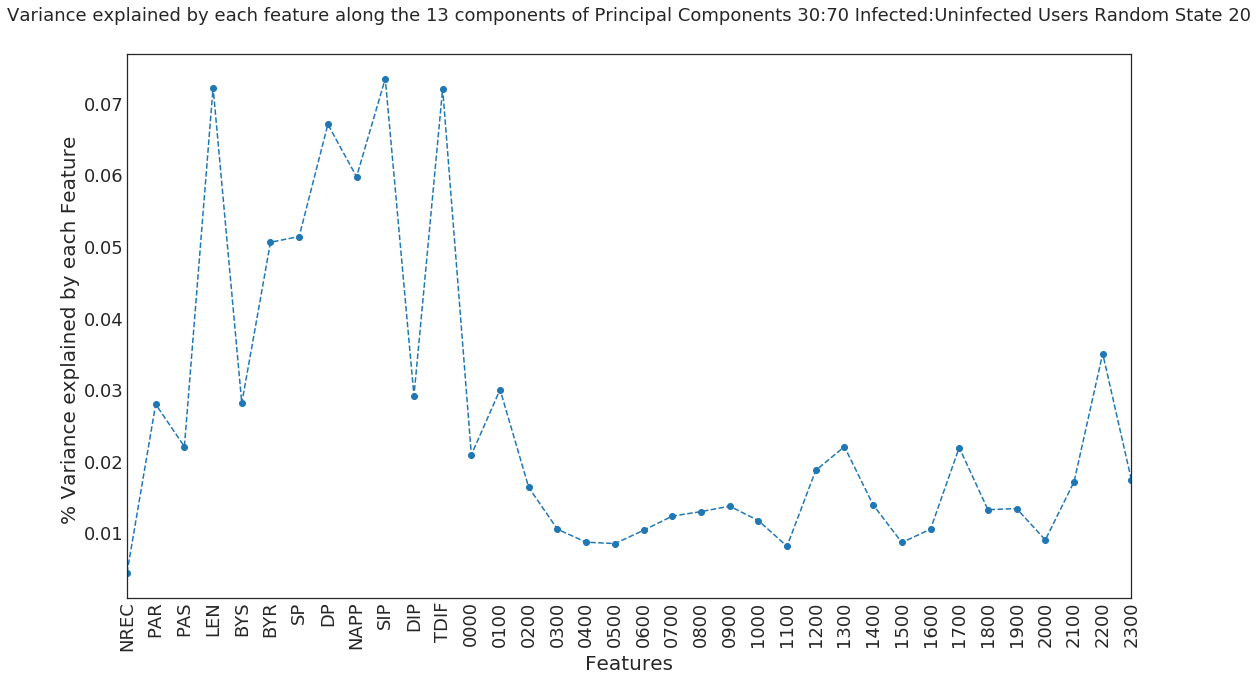

In [110]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 30:70 Infected:Uninfected Users Random State 20',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 1.67269049418e+17

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 3.42819384539e+16

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4485.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 3.20660877105e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1923.00    0.0    0.0    0.0
uninfected#     4484.00    1.0    1.0    1.0
infected%         30.01    0.0    0.0    0.0
uninfected%       69.99  100.0  100.0  100.0

Sum of square of distances is: 9.61641021836e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



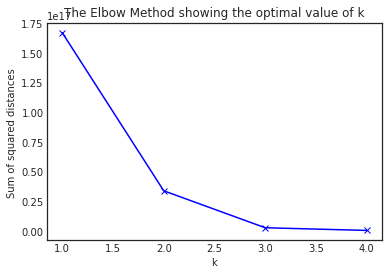

The minimum sum of sqaures of distances is : 9.61641021836e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [111]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 230760.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 109295.263198

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1294.00   629.00    0.0
uninfected#      736.00  3750.00    1.0
infected%         63.74    14.36    0.0
uninfected%       36.26    85.64  100.0

Sum of square of distances is: 79736.787468

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#        635.00    0.0  1288.00    0.0
uninfected#     3754.00    1.0   731.00    1.0
infected%         14.47    0.0    63.79    0.0
uninfected%       85.53  100.0    36.21  100.0

Sum of square of distances is: 65394.1001544

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



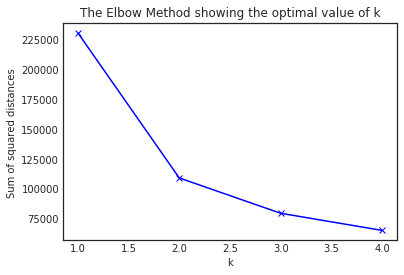

The minimum sum of sqaures of distances is : 65394.1001544  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [112]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.821761956989 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 19227.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 12995.3927317

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4484.00    1.0    2.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 6819.84274002

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1403.00   520.00    0.0    0.0
uninfected#      888.00  3596.00    1.0    2.0
infected%         61.24    12.63    0.0    0.0
uninfected%       38.76    87.37  100.0  100.0

Sum of square of distances is: 2539.33655108

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



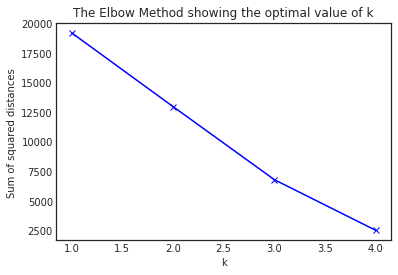

The minimum sum of sqaures of distances is : 2539.33655108  for k 4


In [113]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.861043578586 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 25636.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 19404.3589725

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1      2
infected#         0.0  1923.00    0.0
uninfected#       1.0  4485.00    1.0
infected%         0.0    30.01    0.0
uninfected%     100.0    69.99  100.0

Sum of square of distances is: 14105.0269628

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1923.00    0.0    0.0    0.0
uninfected#     4484.00    1.0    1.0    1.0
infected%         30.01    0.0    0.0    0.0
uninfected%       69.99  100.0  100.0  100.0

Sum of square of distances is: 7873.3842035

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



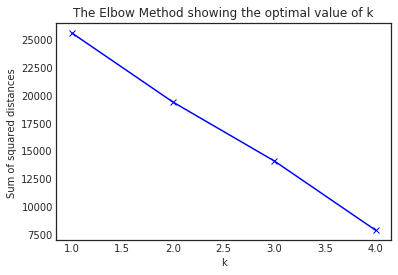

The minimum sum of sqaures of distances is : 7873.3842035  for k 4


In [114]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.892677141305 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 32045.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 25747.3555477

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4485.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 19507.2546548

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1923.00    0.0    0.0    0.0
uninfected#     4484.00    1.0    1.0    1.0
infected%         30.01    0.0    0.0    0.0
uninfected%       69.99  100.0  100.0  100.0

Sum of square of distances is: 13810.3906215

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



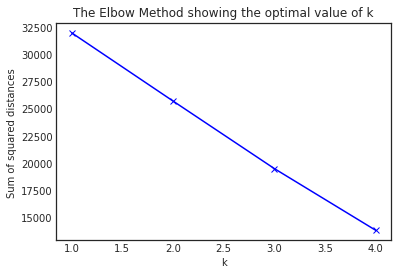

The minimum sum of sqaures of distances is : 13810.3906215  for k 4


In [115]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.917924159701 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 38454.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 32151.7154232

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4485.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 25861.6443882

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1923.00    0.0    0.0    0.0
uninfected#     4484.00    1.0    1.0    1.0
infected%         30.01    0.0    0.0    0.0
uninfected%       69.99  100.0  100.0  100.0

Sum of square of distances is: 20156.8129326

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



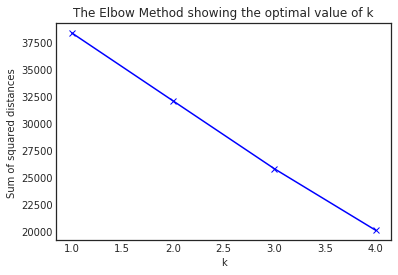

The minimum sum of sqaures of distances is : 20156.8129326  for k 4


In [116]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.956652438558 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 57681.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 51328.3496533

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4485.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 45005.00636

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#        576.00  1347.00    0.0    0.0
uninfected#     3673.00   812.00    1.0    1.0
infected%         13.56    62.39    0.0    0.0
uninfected%       86.44    37.61  100.0  100.0

Sum of square of distances is: 40377.6067401

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



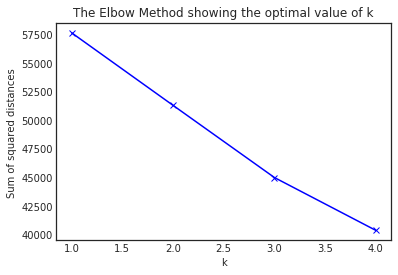

The minimum sum of sqaures of distances is : 40377.6067401  for k 4


In [117]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.969314950865 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 70499.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 64109.0790027

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4485.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 57781.6612585

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2      3
infected#       1325.0   598.0    0.0    0.0
uninfected#      812.0  3673.0    1.0    1.0
infected%         62.0    14.0    0.0    0.0
uninfected%       38.0    86.0  100.0  100.0

Sum of square of distances is: 53056.6418925

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



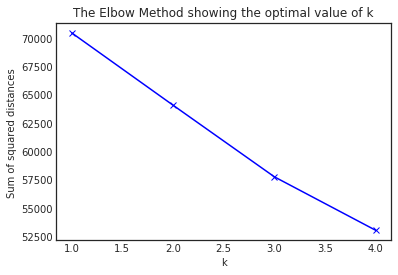

The minimum sum of sqaures of distances is : 53056.6418925  for k 4


In [118]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.973454104428 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 76908.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 70518.033769

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       1923.00    0.0    0.0
uninfected#     4485.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 64182.1839476

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1323.00   600.00    0.0    0.0
uninfected#      814.00  3671.00    1.0    1.0
infected%         61.91    14.05    0.0    0.0
uninfected%       38.09    85.95  100.0  100.0

Sum of square of distances is: 59454.229595

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



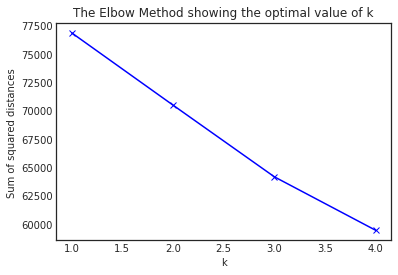

The minimum sum of sqaures of distances is : 59454.229595  for k 4


In [119]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.97709676314 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       1923.0
uninfected#     4487.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 83317.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       1923.0    0.0
uninfected#     4486.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 76926.8237946

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
infected#        602.00    0.0  1321.0
uninfected#     3659.00    1.0   827.0
infected%         14.13    0.0    61.5
uninfected%       85.87  100.0    38.5

Sum of square of distances is: 72203.6870219

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1339.00   584.00    0.0    0.0
uninfected#      855.00  3630.00    1.0    1.0
infected%         61.03    13.86    0.0    0.0
uninfected%       38.97    86.14  100.0  100.0

Sum of square of distances is: 65816.6523558

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



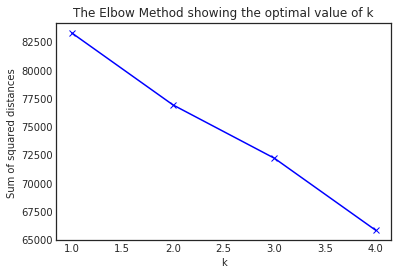

The minimum sum of sqaures of distances is : 65816.6523558  for k 4


In [120]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

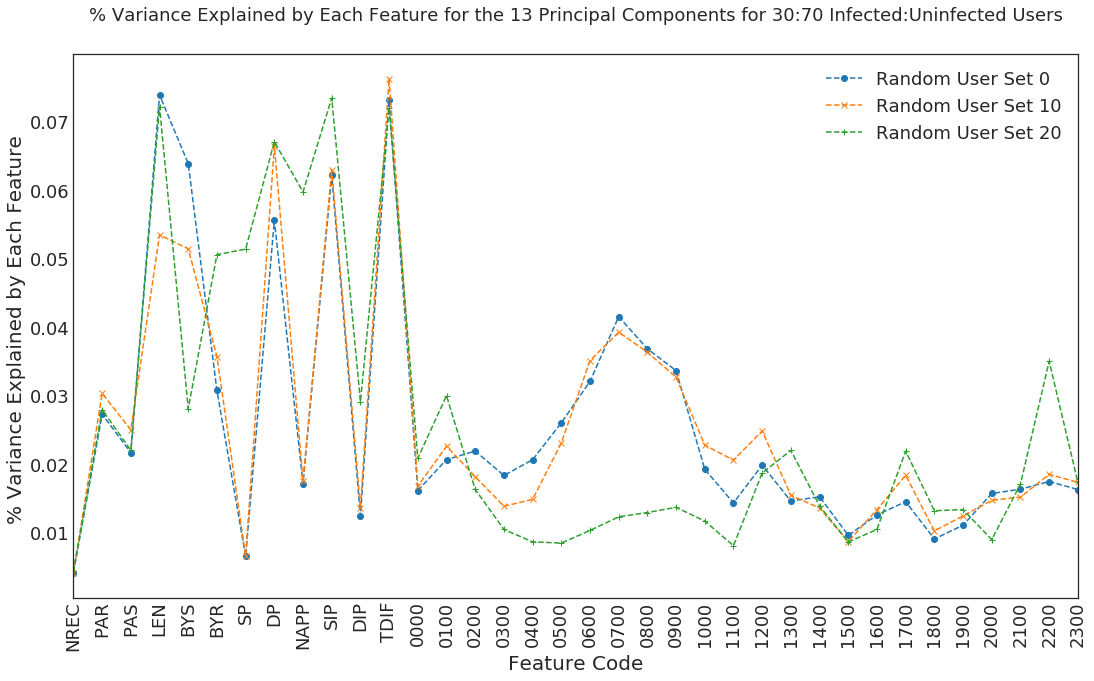

In [121]:
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data_70_0.std(axis=0)), '--o', label = 'Random User Set 0')
plt.plot(np.square(pca_inv_data_70_10.std(axis=0)), '--x', label = 'Random User Set 10')
plt.plot(np.square(pca_inv_data_70_20.std(axis=0)), '--+', label = 'Random User Set 20')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Variance Explained by Each Feature for the 13 Principal Components for 30:70 Infected:Uninfected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

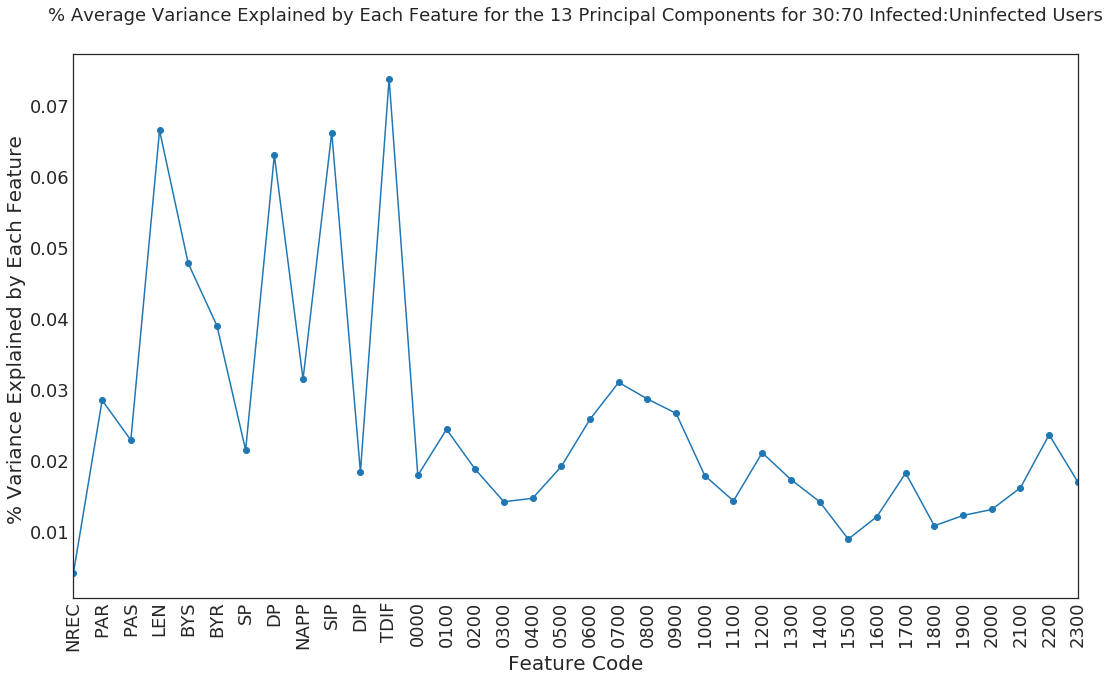

In [122]:
avg_variance_70=np.square(pca_inv_data_70_0.std(axis=0))+np.square(pca_inv_data_70_10.std(axis=0))+np.square(pca_inv_data_70_20.std(axis=0))

avg_variance_70=avg_variance_70/3

sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(avg_variance_70, '-o')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Average Variance Explained by Each Feature for the 13 Principal Components for 30:70 Infected:Uninfected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

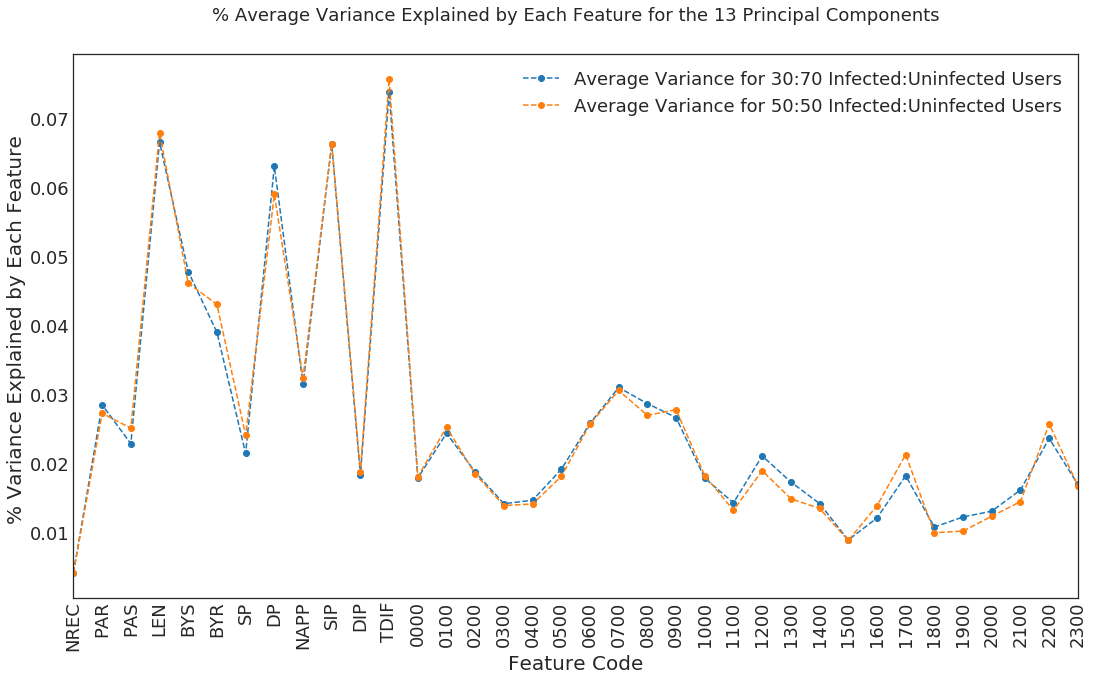

In [123]:
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(avg_variance_70, '--o', label = 'Average Variance for 30:70 Infected:Uninfected Users')
plt.plot(avg_variance_50, '--o', label = 'Average Variance for 50:50 Infected:Uninfected Users')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Average Variance Explained by Each Feature for the 13 Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

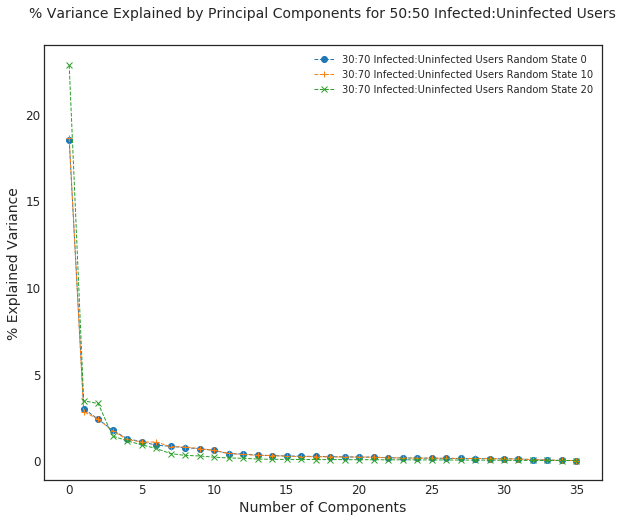

In [124]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_70_0, '--o', linewidth=1,alpha=1,label='30:70 Infected:Uninfected Users Random State 0')
plt.plot(pca_explained_variance_70_10,'--+', linewidth=1,alpha=1,label='30:70 Infected:Uninfected Users Random State 10')
plt.plot(pca_explained_variance_70_20,'--x', linewidth=1,alpha=1,label='30:70 Infected:Uninfected Users Random State 20')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Infected:Uninfected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


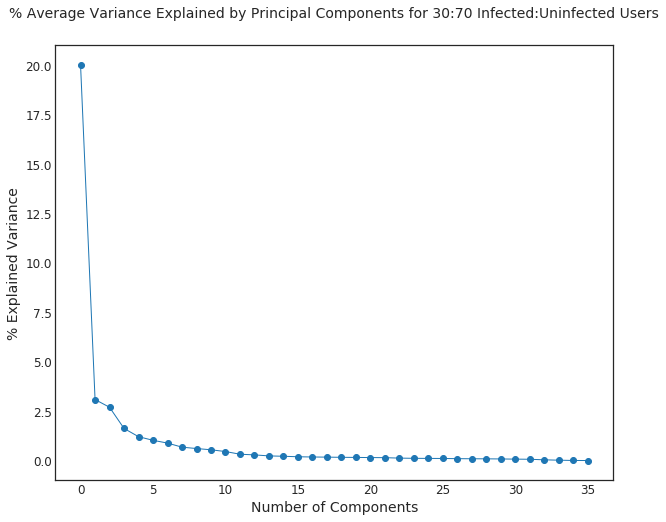

In [125]:
pca_explained_variance_70_avg=pca_explained_variance_70_0+pca_explained_variance_70_10+pca_explained_variance_70_20
pca_explained_variance_70_avg=pca_explained_variance_70_avg/3
sns.set_style('white')

plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_70_avg, '-o', linewidth=1,alpha=1)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Average Variance Explained by Principal Components for 30:70 Infected:Uninfected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()

In [126]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')